In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qmplot import manhattanplot
import re

In [2]:
def significant_loci_counts(df):
    list_chromosomes = []
    for chromosome in set(df.chromosome):
        list_loci = []
        bp_pos = []
        df_chromosome = df[df.chromosome == chromosome]
        df_chromosome = df_chromosome.sort_values(by = ['base_pair_location']).reset_index()
        df_chromosome = df_chromosome.drop(['index'], axis=1)
        df_chromosome.reset_index(inplace=True, drop=True); 
        df_significant_chromosome = df_chromosome[df_chromosome['p_value'] < 5e-8]
        if(len(df_significant_chromosome) > 0):
            first_bp = df_significant_chromosome.base_pair_location.to_list()[0]
            counter = 1
            for bp in df_significant_chromosome.base_pair_location:
                if first_bp == 0:
                    bp_pos = []
                    bp_pos.append(first_bp)
                    first_bp = bp
                    counter = 0
                elif(bp - first_bp < 1000000):
                    counter+= 1
                    bp_pos.append(bp)
                    continue
                else:
                   #if(counter > 10): 
                   list_loci.append({"start_pos": first_bp, "end_pos": bp_pos[len(bp_pos) - 1], "bp_pos":bp_pos, "sig_count": counter})
                   first_bp = 0
            list_loci.append({"start_pos": first_bp, "end_pos": bp_pos[len(bp_pos) - 1], "bp_pos":bp_pos, "sig_count": counter})
            list_chromosomes.append({'chromosome': chromosome, 'list_significant_loci': list_loci})
    x = []
    y = []
    for row in list_chromosomes:
        chrom = row['chromosome']
        chrom_int = 0
        if(chrom == "X"):
            chrom_int = 23
        elif chrom == "XY": 
            chrom_int = 24
        elif chrom == "MT":
            chrom_int = 25
        elif chrom == "Y":
            chrom_int = 26
        else:
            chrom_int = chrom
        #we can plot with only int values in bar chart hence encoded to int values
        x.append(chrom_int)
        y.append(len(row['list_significant_loci']))

    total_sig = sum(y)
    return list_chromosomes, total_sig

In [3]:
df_fasting_glucose = pd.read_table("../dataset/FastingGlucose/34059833-GCST90002232-EFO_0004468-Build37.f.tsv", low_memory=False)
df_fasting_insulin = pd.read_table("../dataset/FastingInsulin/34059833-GCST90002238-EFO_0004467-Build37.f.tsv", low_memory=False)
df_HbA1c = pd.read_table("../dataset/HbA1c/34059833-GCST90002244-EFO_0004541-Build37.f.tsv", low_memory=False)
df_BMI = pd.read_table("../dataset/LocalDatasets/Loh_BodyMassIndex_hg19.tsv", low_memory=False)
df_T2D = pd.read_table("../dataset/LocalDatasets/Mahajan_AST_hg19.tsv", low_memory=False)
df_GCN = pd.read_table("../dataset/LocalDatasets/Stinson_GCN_hg19.tsv", low_memory=False)

In [4]:
df_BMI = df_BMI.rename(columns={"chr": "chromosome", "pos": "base_pair_location", 
                                        "Allele1": "effect_allele", "Allele2": "other_allele",
                                        "Freq1": "effect_allele_frequency", "Effect": "beta",
                                        "P-value": "p_value",
                                        "StdErr": "standard_error"})

In [5]:
df_BMI.loc[df_BMI.effect_allele == 'a', 'effect_allele'] = 'A'
df_BMI.loc[df_BMI.effect_allele == 't', 'effect_allele'] = 'T'
df_BMI.loc[df_BMI.effect_allele == 'c', 'effect_allele'] = 'C'

In [6]:
df_BMI.loc[df_BMI.other_allele == 'g', 'other_allele'] = 'G'
df_BMI.loc[df_BMI.other_allele == 'c', 'other_allele'] = 'C'
df_BMI.loc[df_BMI.other_allele == 't', 'other_allele'] = 'T'

In [7]:
df_T2D = df_T2D.rename(columns={"CHROM": "chromosome", "POS": "base_pair_location", 
                                        "EA": "effect_allele", "OA": "other_allele",
                                        "EAF": "effect_allele_frequency", "ES": "beta",
                                        "P": "p_value",
                                        "SE": "standard_error"})

In [8]:
df_GCN = df_GCN.rename(columns={"CHROM": "chromosome", "POS": "base_pair_location", 
                                        "EA": "effect_allele", "OA": "other_allele",
                                        "EAF": "effect_allele_frequency", "ES": "beta",
                                        "P": "p_value",
                                        "SE": "standard_error"})

In [9]:
Omni_z =np.loadtxt('omni_z.txt', usecols=range(1))

In [10]:
df = pd.read_table("../output_csv/df_candidate.csv", low_memory=False, sep=";")

In [11]:
def formatdf_plot(df, p_values):
    df = df.rename(columns={"chromosome": "CHR", "base_pair_location": "BP"})
    df["P"] = p_values
    df.dropna(subset=['CHR', 'P'])
    
    df["SNP"] = df["BP"]
    df["GENE"] = "Not Given"
    df["DISTANCE"] = "Not Given" 
    
    df = df.sort_values(by = ['CHR', "BP"]).reset_index()

    return df

In [12]:
df_omni_z = formatdf_plot(df, Omni_z)

In [13]:
Sum_z =np.loadtxt('sum_z.txt', usecols=range(1))
df_sum_z = formatdf_plot(df, Sum_z)
df_sum_z

,index,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,P,SNP,GENE,DISTANCE
0,2346232,1,10177,D,I,-0.844828,0.808081,-0.802632,NaN,NaN,NaN,0.810781,10177,Not Given,Not Given
1,2343859,1,10352,D,I,-0.801802,-2.000000,0.054795,NaN,NaN,NaN,0.433312,10352,Not Given,Not Given
2,2283958,1,10539,A,C,-0.198464,0.488114,-1.172727,NaN,NaN,NaN,0.801132,10539,Not Given,Not Given
3,2272578,1,10583,A,G,-0.435323,-0.532110,NaN,NaN,NaN,NaN,0.782591,10583,Not Given,Not Given
4,2269556,1,10611,C,G,-0.416667,-0.552055,-1.312308,NaN,NaN,NaN,0.515289,10611,Not Given,Not Given
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44245761,44232288,24,155251035,D,I,1.035489,-0.694407,NaN,NaN,NaN,NaN,0.922498,155251035,Not Given,Not Given
44245762,44232286,24,155255094,T,C,1.320652,0.322581,-1.314516,NaN,NaN,NaN,0.925299,155255094,Not Given,Not Given
44245763,44245763,25,13276,T,C,NaN,NaN,NaN,NaN,-1.918919,NaN,0.584146,13276,Not Given,Not Given
44245764,44245765,26,18101521,A,T,NaN,NaN,NaN,NaN,-1.125000,NaN,0.748296,18101521,Not Given,Not Given


In [14]:
SHom_scores = np.loadtxt('sHom_p.txt', usecols=range(1))
df_SHom_scores = formatdf_plot(df, SHom_scores)
df_SHom_scores

,index,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,P,SNP,GENE,DISTANCE
0,2346232,1,10177,D,I,-0.844828,0.808081,-0.802632,NaN,NaN,NaN,0.966070,10177,Not Given,Not Given
1,2343859,1,10352,D,I,-0.801802,-2.000000,0.054795,NaN,NaN,NaN,0.656890,10352,Not Given,Not Given
2,2283958,1,10539,A,C,-0.198464,0.488114,-1.172727,NaN,NaN,NaN,0.968340,10539,Not Given,Not Given
3,2272578,1,10583,A,G,-0.435323,-0.532110,NaN,NaN,NaN,NaN,0.881213,10583,Not Given,Not Given
4,2269556,1,10611,C,G,-0.416667,-0.552055,-1.312308,NaN,NaN,NaN,0.796763,10611,Not Given,Not Given
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44245761,44232288,24,155251035,D,I,1.035489,-0.694407,NaN,NaN,NaN,NaN,0.982374,155251035,Not Given,Not Given
44245762,44232286,24,155255094,T,C,1.320652,0.322581,-1.314516,NaN,NaN,NaN,0.899546,155255094,Not Given,Not Given
44245763,44245763,25,13276,T,C,NaN,NaN,NaN,NaN,-1.918919,NaN,0.107023,13276,Not Given,Not Given
44245764,44245765,26,18101521,A,T,NaN,NaN,NaN,NaN,-1.125000,NaN,0.344711,18101521,Not Given,Not Given


In [15]:
SHet_scores = np.loadtxt('SHet_p.txt', usecols=range(1))
df_SHet_scores = formatdf_plot(df, SHet_scores)
df_SHet_scores

,index,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,P,SNP,GENE,DISTANCE
0,2346232,1,10177,D,I,-0.844828,0.808081,-0.802632,NaN,NaN,NaN,0.000247,10177,Not Given,Not Given
1,2343859,1,10352,D,I,-0.801802,-2.000000,0.054795,NaN,NaN,NaN,0.000043,10352,Not Given,Not Given
2,2283958,1,10539,A,C,-0.198464,0.488114,-1.172727,NaN,NaN,NaN,0.000155,10539,Not Given,Not Given
3,2272578,1,10583,A,G,-0.435323,-0.532110,NaN,NaN,NaN,NaN,0.000438,10583,Not Given,Not Given
4,2269556,1,10611,C,G,-0.416667,-0.552055,-1.312308,NaN,NaN,NaN,0.000327,10611,Not Given,Not Given
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44245761,44232288,24,155251035,D,I,1.035489,-0.694407,NaN,NaN,NaN,NaN,0.000452,155251035,Not Given,Not Given
44245762,44232286,24,155255094,T,C,1.320652,0.322581,-1.314516,NaN,NaN,NaN,0.000103,155255094,Not Given,Not Given
44245763,44245763,25,13276,T,C,NaN,NaN,NaN,NaN,-1.918919,NaN,0.000019,13276,Not Given,Not Given
44245764,44245765,26,18101521,A,T,NaN,NaN,NaN,NaN,-1.125000,NaN,0.000114,18101521,Not Given,Not Given


In [16]:
fg_sig_loci, fg_total_sig = significant_loci_counts(df_fasting_glucose)

In [17]:
fg_total_sig

89

In [18]:
fi_sig_loci, fi_total_sig = significant_loci_counts(df_fasting_insulin)
fi_total_sig

59

In [19]:
hba1c_sig_loci, hba1c_total_sig = significant_loci_counts(df_HbA1c)
hba1c_total_sig

88

In [20]:
t2d_sig_loci, t2d_total_sig = significant_loci_counts(df_T2D)
t2d_total_sig

184

In [21]:
bmi_sig_loci, bmi_total_sig = significant_loci_counts(df_BMI)
bmi_total_sig

790

In [22]:
gcn_sig_loci, gcn_total_sig = significant_loci_counts(df_GCN)
gcn_total_sig

0

In [23]:
def count_suggestive_loci_counts(df, dataset_name, sig):
    df = df.rename(columns={"CHR": "chromosome", "BP": "base_pair_location", "P": "p_value"})
    list_chromosomes = []
    for chromosome in set(df.chromosome):
        list_loci = []
        bp_pos = []
        df_chromosome = df[df.chromosome == chromosome]
        df_chromosome = df_chromosome.sort_values(by = ['base_pair_location']).reset_index()
        df_chromosome = df_chromosome.drop(['index'], axis=1)
        df_chromosome.reset_index(inplace=True, drop=True); 
        df_significant_chromosome = df_chromosome[df_chromosome['p_value'] < sig]
        if(len(df_significant_chromosome) > 0):
            first_bp = 0 
            counter = 1
            for bp in df_significant_chromosome.base_pair_location:
                if first_bp == 0:
                    bp_pos = []
                    bp_pos.append(first_bp)
                    first_bp = bp
                    counter = 0
                elif(bp - first_bp < 1000000):
                    counter+= 1
                    bp_pos.append(bp)
                    continue
                else:
                   #if(counter > 10): 
                   list_loci.append({"start_pos": first_bp, "end_pos": bp_pos[len(bp_pos) - 1], "bp_pos":bp_pos, "sig_count": counter})
                   first_bp = 0
            list_loci.append({"start_pos": first_bp, "end_pos": bp_pos[len(bp_pos) - 1], "bp_pos":bp_pos, "sig_count": counter})
            list_chromosomes.append({'chromosome': chromosome, 'list_significant_loci': list_loci})
    x = []
    y = []
    for row in list_chromosomes:
        chrom = row['chromosome']
        chrom_int = 0
        if(chrom == "X"):
            chrom_int = 23
        elif chrom == "XY": 
            chrom_int = 24
        elif chrom == "MT":
            chrom_int = 25
        elif chrom == "Y":
            chrom_int = 26
        else:
            chrom_int = chrom
        #we can plot with only int values in bar chart hence encoded to int values
        x.append(chrom_int)
        y.append(len(row['list_significant_loci']))

    total_sig = sum(y)
    return list_chromosomes, total_sig

In [24]:
omni_sig_loci, omni_total_sig = count_suggestive_loci_counts(df_omni_z, "Omni Z", 5e-8)

In [25]:
omni_total_sig

1123

In [26]:
sumz_sig_loci, sumz_total_sig = count_suggestive_loci_counts(df_sum_z, "Sum Z", 5e-8)
sumz_total_sig

235

In [27]:
shet_sig_loci, shet_total_sig = count_suggestive_loci_counts(df_SHet_scores, "SHet", 5e-8)
shet_total_sig

2712

In [28]:
shom_sig_loci, shom_total_sig = count_suggestive_loci_counts(df_SHom_scores, "SHom", 5e-8)
shom_total_sig

653

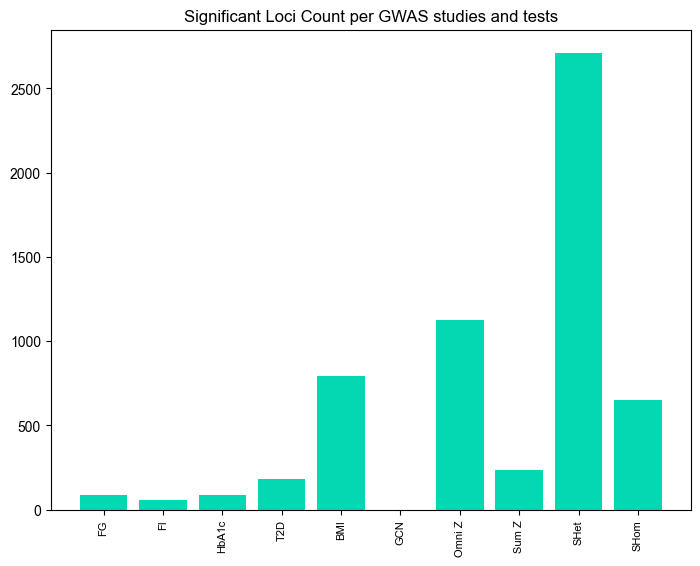

In [29]:
x = ["FG", "FI", "HbA1c", "T2D", "BMI", "GCN", "Omni Z", "Sum Z", "SHet", "SHom"]
y = [fg_total_sig, fi_total_sig, hba1c_total_sig,
     t2d_total_sig, bmi_total_sig, gcn_total_sig,
     omni_total_sig, sumz_total_sig, shet_total_sig, shom_total_sig]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y, color="#04D8B2")
ax.set_title('Significant Loci Count per GWAS studies and tests')
plt.xticks(rotation='vertical', fontsize = 8)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.savefig(f'../output_figs/{re.sub(r"[^a-zA-Z0-9]","","Fig5 Significant Loci Count per GWAS and test")}.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [30]:
df_omni_sig = df_omni_z[df_omni_z.P < 5e-8]

In [31]:
df_omni_sig

,index,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,P,SNP,GENE,DISTANCE
4603,544586,1,910174,T,C,11.367550,1.527988,-0.875197,0.611785,0.451613,-0.056916,4.903740e-26,910174,Not Given,Not Given
5070,544492,1,933045,T,C,7.853698,0.935271,0.618506,0.031962,-3.087678,-0.785771,1.728542e-13,933045,Not Given,Not Given
18292,543626,1,1520725,T,C,0.020000,-0.581395,0.558140,-1.862069,-8.227273,0.372093,4.871140e-13,1520725,Not Given,Not Given
18324,543631,1,1521805,A,G,-0.160000,-0.102564,-1.083333,1.930233,7.409091,0.100000,2.071730e-10,1521805,Not Given,Not Given
18328,543632,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,2.340603e-10,1522006,Not Given,Not Given
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43409999,42865823,22,50699331,C,G,3.320000,3.571429,1.933333,0.893939,-5.421053,0.230769,4.755097e-10,50699331,Not Given,Not Given
43410001,42865824,22,50699404,T,C,-2.960000,-3.571429,-1.866667,-0.500000,5.526316,-0.382166,1.186035e-09,50699404,Not Given,Not Given
43410168,42865830,22,50709495,A,G,3.153846,2.380952,2.066667,2.954545,-5.947368,0.948387,1.614560e-13,50709495,Not Given,Not Given
43410293,42866027,22,50714289,T,C,1.800000,1.000000,0.555556,1.905405,-5.909091,0.511364,1.730372e-09,50714289,Not Given,Not Given


In [32]:
df_fasting_insulin_sig = df_fasting_insulin[df_fasting_insulin.p_value < 5e-8]
df_fasting_glucose_sig = df_fasting_glucose[df_fasting_glucose.p_value < 5e-8]
df_HbA1c_sig = df_HbA1c[df_HbA1c.p_value < 5e-8]
df_BMI_sig = df_BMI[df_BMI.p_value < 5e-8]
df_T2D_sig = df_T2D[df_T2D.p_value < 5e-8]
df_GCN_sig = df_GCN[df_GCN.p_value < 5e-8]

In [33]:
def sub_set(df, chromosome):
    #sub table
    df =  df[['chromosome', 'base_pair_location', 'effect_allele', 
                                            'other_allele']]
    df= df[df.chromosome == chromosome]
    return df
    
def merge_(df1, df2, df1z_short = '', df2z_short = ''):
    df_sub = df1.merge(df2, on=['chromosome','base_pair_location', 'effect_allele', 
                                            'other_allele'], how = 'outer').sort_index(axis=1)
    return df_sub

def chromosome_(df, chrom):
    df_chrm = sub_set(df, chrom)
    return df_chrm
    

#all 6 traits   
def get_chromosome(chrm):
    df_fasting_insulin_chrm = chromosome_(df_fasting_insulin_sig, chrm)
    df_fasting_glucose_chrm = chromosome_(df_fasting_glucose_sig, chrm)
    df_HbA1c_chrm = chromosome_(df_HbA1c_sig, chrm)
    df_BMI_chrm = chromosome_(df_BMI_sig, chrm)
    df_T2D_chrm = chromosome_(df_T2D_sig, chrm)
    df_GCN_chrm = chromosome_(df_GCN_sig, chrm)
    df_fasting_insulin_chrm = df_fasting_insulin_chrm[['chromosome', 'base_pair_location', 'effect_allele', 
                                            'other_allele']]
    df_fasting_glucose_chrm = df_fasting_glucose_chrm[['chromosome', 'base_pair_location', 'effect_allele', 
                                            'other_allele']]
    df_HbA1c_chrm = df_HbA1c_chrm[['chromosome', 'base_pair_location', 'effect_allele', 
                                            'other_allele']]
    df_BMI_chrm = df_BMI_chrm[['chromosome', 'base_pair_location', 'effect_allele', 
                                            'other_allele']]
    df_T2D_chrm = df_T2D_chrm[['chromosome', 'base_pair_location', 'effect_allele', 
                                            'other_allele']]
    df_GCN_chrm = df_GCN_chrm[['chromosome', 'base_pair_location', 'effect_allele', 
                                            'other_allele']]
    df_1 = merge_(df_fasting_insulin_chrm, df_fasting_glucose_chrm)
    df_2 = merge_(df_HbA1c_chrm, df_BMI_chrm)
    df_3 = merge_(df_T2D_chrm, df_GCN_chrm)
    
    df_4 = merge_(df_1, df_2)
    df = merge_(df_3, df_4)
    
    return df
    

In [34]:
df_sig = get_chromosome(1)

In [35]:
df_sig

,base_pair_location,chromosome,effect_allele,other_allele
0,39550621,1,T,C
1,39551488,1,T,C
2,39552963,1,T,C
3,39554034,1,T,G
4,39560250,1,T,C
...,...,...,...,...
1005,219773122,1,C,G
1006,219788530,1,A,G
1007,219792380,1,A,G
1008,219793052,1,A,G


In [36]:
for i in range (2, 27):
    df = get_chromosome(i)
    dft = df[['chromosome', 'base_pair_location','effect_allele', 'other_allele']]
    df_sig = df_sig.append(dft)

df_sig

/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/1334428881.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sig = df_sig.append(dft)
/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/1334428881.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sig = df_sig.append(dft)
/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/1334428881.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sig = df_sig.append(dft)
/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/1334428881.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sig = df_sig.append(dft)
/var/folders/wk/3fc1

,base_pair_location,chromosome,effect_allele,other_allele
0,39550621,1,T,C
1,39551488,1,T,C
2,39552963,1,T,C
3,39554034,1,T,G
4,39560250,1,T,C
...,...,...,...,...
218,50591470,22,A,G
219,50601016,22,T,C
220,50601907,22,T,C
221,50604696,22,A,G


In [37]:
df_omni_sig

,index,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,P,SNP,GENE,DISTANCE
4603,544586,1,910174,T,C,11.367550,1.527988,-0.875197,0.611785,0.451613,-0.056916,4.903740e-26,910174,Not Given,Not Given
5070,544492,1,933045,T,C,7.853698,0.935271,0.618506,0.031962,-3.087678,-0.785771,1.728542e-13,933045,Not Given,Not Given
18292,543626,1,1520725,T,C,0.020000,-0.581395,0.558140,-1.862069,-8.227273,0.372093,4.871140e-13,1520725,Not Given,Not Given
18324,543631,1,1521805,A,G,-0.160000,-0.102564,-1.083333,1.930233,7.409091,0.100000,2.071730e-10,1521805,Not Given,Not Given
18328,543632,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,2.340603e-10,1522006,Not Given,Not Given
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43409999,42865823,22,50699331,C,G,3.320000,3.571429,1.933333,0.893939,-5.421053,0.230769,4.755097e-10,50699331,Not Given,Not Given
43410001,42865824,22,50699404,T,C,-2.960000,-3.571429,-1.866667,-0.500000,5.526316,-0.382166,1.186035e-09,50699404,Not Given,Not Given
43410168,42865830,22,50709495,A,G,3.153846,2.380952,2.066667,2.954545,-5.947368,0.948387,1.614560e-13,50709495,Not Given,Not Given
43410293,42866027,22,50714289,T,C,1.800000,1.000000,0.555556,1.905405,-5.909091,0.511364,1.730372e-09,50714289,Not Given,Not Given


In [42]:
df_omni_sig = df_omni_sig.drop(columns='index')

In [45]:
df_omni_sig

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,P,SNP,GENE,DISTANCE
4603,1,910174,T,C,11.367550,1.527988,-0.875197,0.611785,0.451613,-0.056916,4.903740e-26,910174,Not Given,Not Given
5070,1,933045,T,C,7.853698,0.935271,0.618506,0.031962,-3.087678,-0.785771,1.728542e-13,933045,Not Given,Not Given
18292,1,1520725,T,C,0.020000,-0.581395,0.558140,-1.862069,-8.227273,0.372093,4.871140e-13,1520725,Not Given,Not Given
18324,1,1521805,A,G,-0.160000,-0.102564,-1.083333,1.930233,7.409091,0.100000,2.071730e-10,1521805,Not Given,Not Given
18328,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,2.340603e-10,1522006,Not Given,Not Given
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43409999,22,50699331,C,G,3.320000,3.571429,1.933333,0.893939,-5.421053,0.230769,4.755097e-10,50699331,Not Given,Not Given
43410001,22,50699404,T,C,-2.960000,-3.571429,-1.866667,-0.500000,5.526316,-0.382166,1.186035e-09,50699404,Not Given,Not Given
43410168,22,50709495,A,G,3.153846,2.380952,2.066667,2.954545,-5.947368,0.948387,1.614560e-13,50709495,Not Given,Not Given
43410293,22,50714289,T,C,1.800000,1.000000,0.555556,1.905405,-5.909091,0.511364,1.730372e-09,50714289,Not Given,Not Given


In [47]:
df_omni_sig_noval = []
for chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p, _ , _ , _ in df_omni_sig[:].to_numpy():
    df_sig_loci = df_sig[(df_sig.chromosome == chrm)&(df_sig.base_pair_location > bp - 1e+6) & (df_sig.base_pair_location < bp + 1e+6)]
    if df_sig_loci.empty:
      df_omni_sig_noval.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])  

In [49]:
len(df_omni_sig_noval)

47688

In [50]:
df_omni_sig_noval = pd.DataFrame(df_omni_sig_noval, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [51]:
df_omni_sig_noval

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
0,1,910174,T,C,11.367550,1.527988,-0.875197,0.611785,0.451613,-0.056916,4.903740e-26
1,1,933045,T,C,7.853698,0.935271,0.618506,0.031962,-3.087678,-0.785771,1.728542e-13
2,1,1520725,T,C,0.020000,-0.581395,0.558140,-1.862069,-8.227273,0.372093,4.871140e-13
3,1,1521805,A,G,-0.160000,-0.102564,-1.083333,1.930233,7.409091,0.100000,2.071730e-10
4,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,2.340603e-10
...,...,...,...,...,...,...,...,...,...,...,...
47683,22,48871624,A,G,-0.238095,-0.263158,-0.214286,2.530303,6.944444,1.000000,5.750789e-09
47684,22,48874310,T,C,-0.142857,-0.157895,-0.142857,2.621212,6.736842,1.006452,2.029264e-08
47685,22,48874412,T,G,-0.285714,-0.052632,0.214286,2.584615,6.684211,0.896774,3.338015e-08
47686,22,48874685,A,G,0.285714,0.052632,-0.214286,-2.584615,-6.631579,-0.896774,4.554419e-08


In [77]:
df_omni_sig_noval[df_omni_sig_noval.p_value > 5e-8]

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value


In [56]:
df_omni_sig_noval_sort = df_omni_sig_noval.sort_values(by=['p_value'], ascending=True)

In [57]:
df_omni_sig_noval_sort[df_omni_sig_noval_sort.p_value > 0]

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
8759,2,169771859,T,C,3.684211,-34.000000,-18.076923,0.560606,0.000000,-0.937500,3.952525e-322
8798,2,169782481,A,T,3.736842,-33.705882,-18.000000,0.803030,0.294118,-1.018750,6.021820e-318
8770,2,169776139,A,T,-3.545455,32.421053,17.466667,0.313433,-0.250000,1.350000,2.393832e-292
8773,2,169776414,T,G,-2.736842,30.437500,15.846154,1.400000,-0.052632,1.108974,8.733352e-250
8816,2,169788474,T,C,2.578947,-30.375000,-15.769231,-1.134328,0.105263,-1.064103,3.020120e-248
...,...,...,...,...,...,...,...,...,...,...,...
1828,1,54742618,A,G,-0.850000,-0.555556,-0.357143,-0.615385,-6.411765,-0.603896,4.997236e-08
46464,20,39651892,C,G,0.000000,-6.181818,-1.294118,-2.436782,-0.833333,1.273171,4.997697e-08
5127,1,190223335,T,C,-1.217391,-0.250000,-0.133333,2.000000,6.571429,-0.552326,4.997981e-08
42959,17,5316742,T,C,-1.047619,0.157895,0.142857,-2.430769,-6.470588,0.936306,4.998653e-08


In [58]:
df_omni_sig_noval_sort[(df_omni_sig_noval_sort.BP > 169771859 - 5e+5) &  (df_omni_sig_noval_sort.BP < 169771859 + 5e+5)]

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
8802,2,169783039,T,G,-3.578947,37.470588,20.307692,-0.373134,-0.352941,1.298137,0.000000e+00
8775,2,169776746,T,C,3.684211,-38.470588,-20.692308,-0.134328,0.000000,-1.283951,0.000000e+00
8772,2,169776360,T,G,-3.800000,38.176471,20.692308,-0.420290,0.150000,1.277778,0.000000e+00
8803,2,169783209,A,G,3.578947,-37.529412,-20.307692,0.388060,0.050000,-1.273292,0.000000e+00
8769,2,169776121,A,T,-3.631579,38.470588,20.769231,0.059701,0.300000,1.271605,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
8900,2,169815106,A,T,0.431655,5.588710,4.301075,0.627168,0.764706,-0.467290,2.725065e-08
21632,5,170197785,A,G,6.598039,1.251562,1.267281,0.914720,-0.010417,-1.089432,2.795556e-08
8575,2,169630483,A,G,0.500000,5.052632,4.071429,0.188406,2.388889,0.047414,3.551215e-08
8905,2,169817713,A,G,-1.660000,5.608696,2.657895,-0.077465,-0.378378,0.974419,3.969687e-08


In [64]:
most_sig_omni = df_omni_sig_noval_sort[(df_omni_sig_noval_sort.BP > 169771859 - 5e+5) &  (df_omni_sig_noval_sort.BP < 169771859 + 5e+5)].iloc[[0]]

In [70]:
most_sig_omni['fg_z'].to_numpy()[0]

37.47058823529412

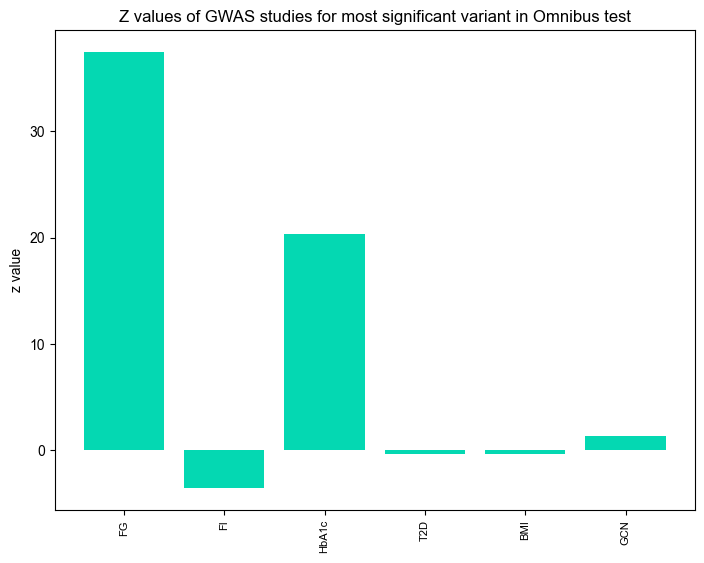

In [73]:
x = ["FG", "FI", "HbA1c", "T2D", "BMI", "GCN"]
y = [most_sig_omni['fg_z'].to_numpy()[0], most_sig_omni['fi_z'].to_numpy()[0], most_sig_omni['hba1c_z'].to_numpy()[0],
     most_sig_omni['t2d_z'].to_numpy()[0], most_sig_omni['bmi_z'].to_numpy()[0], most_sig_omni['gcn_z'].to_numpy()[0]]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y, color="#04D8B2")
ax.set_title('Z values of GWAS studies for most significant variant in Omnibus test')
plt.xticks(rotation='vertical', fontsize = 8)
plt.ylabel("z value")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.savefig(f'../output_figs/{re.sub(r"[^a-zA-Z0-9]","","Fig8 Z values of GWAS studies for most significant variant in Omnibus test")}.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [74]:
omni_sig_noval_loci, omni_sig_noval_total = count_suggestive_loci_counts(df_omni_sig_noval, "Omni Z", 5e-8)

In [75]:
omni_sig_noval_total

893

In [76]:
omni_total_sig

1123

In [78]:
df_sum_z_sig = df_sum_z[df_sum_z.P < 5e-8]

In [81]:
df_sum_z_sig = df_sum_z_sig.drop(columns='index')

In [82]:
df_sum_z_sig

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,P,SNP,GENE,DISTANCE
204,1,85892,A,G,-19.106496,-0.608482,0.669038,NaN,-1.074018,NaN,9.530598e-09,85892,Not Given,Not Given
440,1,527219,A,G,10.148176,14.313520,NaN,NaN,NaN,NaN,3.009393e-12,527219,Not Given,Not Given
1982,1,785503,A,G,12.313704,7.650759,0.960052,NaN,-1.972656,0.408578,3.347104e-08,785503,Not Given,Not Given
10854,1,1189802,A,G,NaN,NaN,-22.159639,NaN,NaN,NaN,2.604451e-10,1189802,Not Given,Not Given
16296,1,1434106,A,G,-0.487109,-1.232886,21.782037,NaN,NaN,NaN,1.050556e-08,1434106,Not Given,Not Given
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43871974,23,90069465,A,G,-11.107807,-8.078072,-0.278539,NaN,NaN,NaN,2.825881e-08,90069465,Not Given,Not Given
43974095,23,110436766,T,C,13.105618,8.518768,NaN,NaN,NaN,NaN,6.916340e-10,110436766,Not Given,Not Given
44004137,23,115833364,A,T,-1.015571,-1.993808,-16.389903,NaN,NaN,NaN,3.142307e-08,115833364,Not Given,Not Given
44073003,23,127683800,C,G,-10.751984,-8.195205,-0.445059,NaN,NaN,NaN,3.178466e-08,127683800,Not Given,Not Given


In [83]:
df_sum_z_sig_noval = []
for chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p, _ , _ , _ in df_sum_z_sig[:].to_numpy():
    df_sig_loci = df_sig[(df_sig.chromosome == chrm)&(df_sig.base_pair_location > bp - 1e+6) & (df_sig.base_pair_location < bp + 1e+6)]
    if df_sig_loci.empty:
        df_sum_z_sig_noval.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])  

In [84]:
len(df_sum_z_sig_noval)

1520

In [85]:
df_sum_z_sig_noval = pd.DataFrame(df_sum_z_sig_noval, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [86]:
df_sum_z_sig_noval

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
0,1,85892,A,G,-19.106496,-0.608482,0.669038,NaN,-1.074018,NaN,9.530598e-09
1,1,527219,A,G,10.148176,14.313520,NaN,NaN,NaN,NaN,3.009393e-12
2,1,785503,A,G,12.313704,7.650759,0.960052,NaN,-1.972656,0.408578,3.347104e-08
3,1,1189802,A,G,NaN,NaN,-22.159639,NaN,NaN,NaN,2.604451e-10
4,1,1434106,A,G,-0.487109,-1.232886,21.782037,NaN,NaN,NaN,1.050556e-08
...,...,...,...,...,...,...,...,...,...,...,...
1515,23,90069465,A,G,-11.107807,-8.078072,-0.278539,NaN,NaN,NaN,2.825881e-08
1516,23,110436766,T,C,13.105618,8.518768,NaN,NaN,NaN,NaN,6.916340e-10
1517,23,115833364,A,T,-1.015571,-1.993808,-16.389903,NaN,NaN,NaN,3.142307e-08
1518,23,127683800,C,G,-10.751984,-8.195205,-0.445059,NaN,NaN,NaN,3.178466e-08


In [87]:
sum_z_sig_noval_loci, sum_z_sig_noval_total = count_suggestive_loci_counts(df_sum_z_sig_noval, "Sum Z", 5e-8)

In [88]:
sum_z_sig_noval_total

171

In [89]:
sumz_total_sig

235

In [90]:
df_sum_z_sig_noval_sort = df_sum_z_sig_noval.sort_values(by=['p_value'], ascending=[True] )

In [122]:
df_sum_z_sig_noval.sort_values(by=['t2d_z','p_value'], ascending=[False, True], key = abs)

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
1272,16,28915217,A,G,-2.000000,2.166667,-4.076923,-5.402985,-12.850000,0.632911,8.191977e-10
1274,16,28917644,T,C,2.050000,-2.222222,4.153846,5.373134,14.052632,-0.588608,7.581827e-11
1273,16,28915527,A,G,-2.000000,2.166667,-4.076923,-5.373134,-13.684211,0.658228,1.973727e-10
1275,16,28919341,A,G,1.904762,-2.277778,4.076923,5.373134,12.850000,-0.620253,1.221461e-09
1271,16,28913787,T,C,2.050000,-2.166667,4.153846,5.328358,15.529412,-0.588608,4.120875e-12
...,...,...,...,...,...,...,...,...,...,...,...
24,1,61290626,T,C,-1.386387,-0.487839,21.036251,NaN,NaN,NaN,4.612310e-08
528,4,20586360,T,C,-1.727149,-1.522546,-15.674467,NaN,-0.232033,NaN,4.655746e-08
138,1,236228558,A,C,-5.316735,-4.710345,-7.993631,NaN,-1.122497,NaN,4.753946e-08
103,1,145094160,A,G,-17.799351,-0.612606,NaN,NaN,-0.716895,NaN,4.864828e-08


In [94]:
most_sig_sum_z = df_sum_z_sig_noval_sort.iloc[[0]]

In [95]:
most_sig_sum_z

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
203,2,169763148,T,C,3.1,-41.5,-21.928571,-0.014286,0.5,-2.203463,4.370704e-70


In [97]:
def plot_most_sig_snp(row, fig_name):
    x = ["FG", "FI", "HbA1c", "T2D", "BMI", "GCN"]
    y = [row['fg_z'].to_numpy()[0], row['fi_z'].to_numpy()[0], row['hba1c_z'].to_numpy()[0],
         row['t2d_z'].to_numpy()[0], row['bmi_z'].to_numpy()[0], row['gcn_z'].to_numpy()[0]]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x,y, color="#04D8B2")
    ax.set_title(fig_name)
    plt.xticks(rotation='vertical', fontsize = 8)
    plt.ylabel("z value")
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.savefig(f'../output_figs/{re.sub(r"[^a-zA-Z0-9]","",fig_name)}.jpg', dpi=400, bbox_inches='tight')
    plt.show()

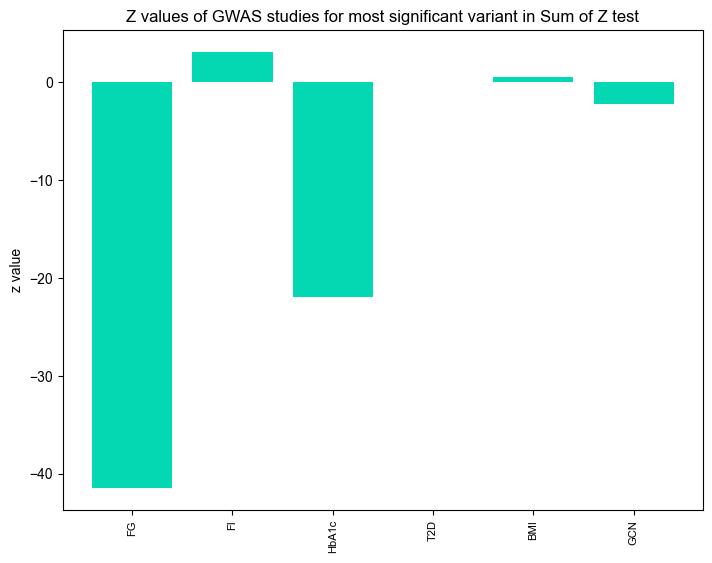

In [364]:
plot_most_sig_snp(most_sig_sum_z, "Z values of GWAS studies for most significant variant in Sum of Z test")

In [125]:
df_SHet_sig = df_SHet_scores[df_SHet_scores.P < 5e-8]

In [126]:
df_SHet_sig = df_SHet_sig.drop(columns='index')

In [127]:
df_SHet_sig_noval = []
for chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p, _ , _ , _ in df_SHet_sig[:].to_numpy():
    df_sig_loci = df_sig[(df_sig.chromosome == chrm)&(df_sig.base_pair_location > bp - 1e+6) & (df_sig.base_pair_location < bp + 1e+6)]
    if df_sig_loci.empty:
        df_SHet_sig_noval.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])  

In [128]:
len(df_SHet_sig_noval)

225910

In [359]:
df_SHet_sig_noval_sort = df_SHet_sig_noval.sort_values(by=['p_value'], ascending=[True])

In [360]:
most_sig_SHet = df_SHet_sig_noval_sort.iloc[[0]]
most_sig_SHet

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
220467,23,46472197,A,C,NaN,NaN,32.688827,NaN,NaN,NaN,1.556279e-213


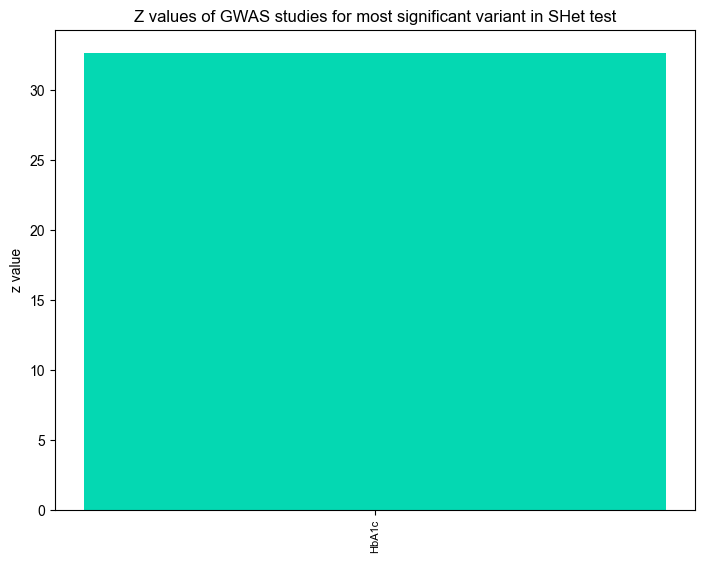

In [365]:
plot_most_sig_snp(most_sig_SHet, "Z values of GWAS studies for most significant variant in SHet test")

In [129]:
df_SHet_sig_noval = pd.DataFrame(df_SHet_sig_noval, columns =  ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [130]:
SHet_sig_noval_loci, SHet_sig_noval_total = count_suggestive_loci_counts(df_SHet_sig_noval, "SHet", 5e-8)

In [131]:
SHet_sig_noval_total

2389

In [132]:
shet_total_sig

2712

In [133]:
df_SHom_sig = df_SHet_scores[df_SHom_scores.P < 5e-8]

In [134]:
df_SHom_sig = df_SHom_sig.drop(columns='index')

In [135]:
df_SHom_sig_noval = []
for chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p, _ , _ , _ in df_SHom_sig[:].to_numpy():
    df_sig_loci = df_sig[(df_sig.chromosome == chrm)&(df_sig.base_pair_location > bp - 1e+6) & (df_sig.base_pair_location < bp + 1e+6)]
    if df_sig_loci.empty:
        df_SHom_sig_noval.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])  

In [136]:
len(df_SHom_sig_noval)

43510

In [362]:
df_SHom_sig_noval_sort = df_SHom_sig_noval.sort_values(by=['p_value'], ascending=[True])

In [363]:
most_sig_SHom = df_SHom_sig_noval_sort.iloc[[0]]
most_sig_SHom

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
7854,2,169776893,D,I,3.545455,-34.842105,-18.866667,NaN,NaN,NaN,2.230042e-171


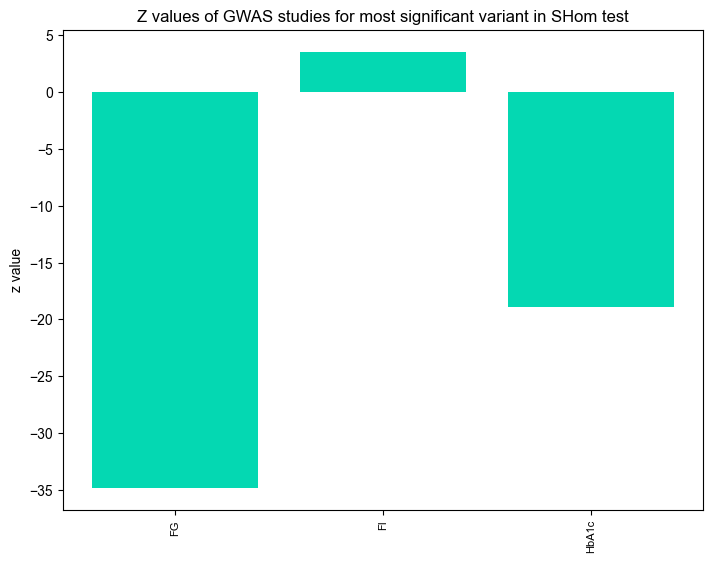

In [366]:
plot_most_sig_snp(most_sig_SHom, "Z values of GWAS studies for most significant variant in SHom test")

In [137]:
df_SHom_sig_noval = pd.DataFrame(df_SHom_sig_noval, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [138]:
SHom_sig_noval_loci, SHom_sig_noval_total = count_suggestive_loci_counts(df_SHom_sig_noval, "SHom", 5e-8)

In [139]:
SHom_sig_noval_total

503

In [140]:
shom_total_sig

653

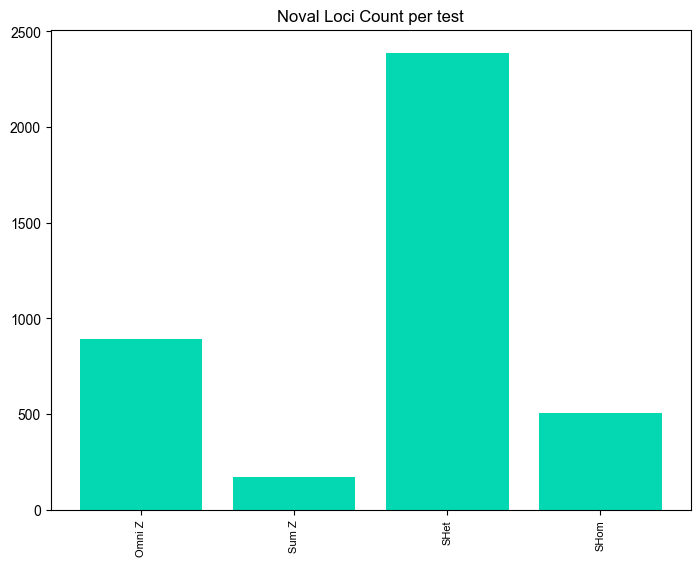

In [141]:
x = ["Omni Z", "Sum Z", "SHet", "SHom"]
y = [omni_sig_noval_total, sum_z_sig_noval_total, SHet_sig_noval_total, SHom_sig_noval_total]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y, color="#04D8B2")
ax.set_title('Noval Loci Count per test')
plt.xticks(rotation='vertical', fontsize = 8)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.savefig(f'../output_figs/{re.sub(r"[^a-zA-Z0-9]","","Fig6 Noval Loci Count per GWAS and test")}.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [143]:
df_omni_sig_noval

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
0,1,910174,T,C,11.367550,1.527988,-0.875197,0.611785,0.451613,-0.056916,4.903740e-26
1,1,933045,T,C,7.853698,0.935271,0.618506,0.031962,-3.087678,-0.785771,1.728542e-13
2,1,1520725,T,C,0.020000,-0.581395,0.558140,-1.862069,-8.227273,0.372093,4.871140e-13
3,1,1521805,A,G,-0.160000,-0.102564,-1.083333,1.930233,7.409091,0.100000,2.071730e-10
4,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,2.340603e-10
...,...,...,...,...,...,...,...,...,...,...,...
47683,22,48871624,A,G,-0.238095,-0.263158,-0.214286,2.530303,6.944444,1.000000,5.750789e-09
47684,22,48874310,T,C,-0.142857,-0.157895,-0.142857,2.621212,6.736842,1.006452,2.029264e-08
47685,22,48874412,T,G,-0.285714,-0.052632,0.214286,2.584615,6.684211,0.896774,3.338015e-08
47686,22,48874685,A,G,0.285714,0.052632,-0.214286,-2.584615,-6.631579,-0.896774,4.554419e-08


In [156]:
df_SHet_sig_noval

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
0,1,55852,C,G,13.524537,-0.028232,-0.158333,NaN,NaN,NaN,2.671108e-18
1,1,82249,A,G,6.464485,1.468000,NaN,NaN,NaN,NaN,4.310440e-09
2,1,88236,T,C,8.907731,0.201493,0.254717,NaN,NaN,NaN,1.255057e-08
3,1,111516,D,I,-8.879113,0.017036,0.736347,NaN,NaN,NaN,1.412429e-08
4,1,133013,T,C,13.341863,-0.991221,NaN,NaN,NaN,NaN,1.788259e-12
...,...,...,...,...,...,...,...,...,...,...,...
225905,24,2333776,A,T,-0.887796,4.133679,NaN,NaN,NaN,NaN,1.053189e-08
225906,24,2589686,T,C,-8.422013,-0.588341,-0.926509,NaN,NaN,NaN,2.083496e-10
225907,24,2601759,A,G,7.497834,0.244508,0.701273,NaN,NaN,NaN,1.342666e-09
225908,24,2638360,A,G,7.357180,0.141841,0.751524,NaN,NaN,NaN,1.204725e-09


In [194]:
df_Omniz_sig_noval_non_overlap_Sumz = []
df_Omniz_sig_noval_non_overlap_SHom = []
df_Omniz_sig_noval_non_overlap_SHet = []
df_Omniz_sig_noval_non_overlap_Sumz_SHom = []
df_Omniz_sig_noval_non_overlap = []
for chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p in df_omni_sig_noval[:].to_numpy():
    df_sum_z_sig_noval_loci = df_sum_z_sig_noval[(df_sum_z_sig_noval.CHR == chrm)&(df_sum_z_sig_noval.BP > bp - 1e+6) & (df_sum_z_sig_noval.BP < bp + 1e+6)]
    df_SHom_sig_noval_loci = df_SHom_sig_noval[(df_SHom_sig_noval.CHR == chrm)&(df_SHom_sig_noval.BP > bp - 1e+6) & (df_SHom_sig_noval.BP < bp + 1e+6)]
    df_SHet_sig_noval_loci = df_SHet_sig_noval[(df_SHet_sig_noval.CHR == chrm)&(df_SHet_sig_noval.BP > bp - 1e+6) & (df_SHet_sig_noval.BP < bp + 1e+6)]

    if df_sum_z_sig_noval_loci.empty and df_SHom_sig_noval_loci.empty:
        df_Omniz_sig_noval_non_overlap_Sumz_SHom.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p]) 
    if df_sum_z_sig_noval_loci.empty and df_SHom_sig_noval_loci.empty and df_SHet_sig_noval_loci.empty:
        df_Omniz_sig_noval_non_overlap.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])  
    if df_sum_z_sig_noval_loci.empty:
        df_Omniz_sig_noval_non_overlap_Sumz.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])  
    if df_SHom_sig_noval_loci.empty:
        df_Omniz_sig_noval_non_overlap_SHom.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])
    if df_SHet_sig_noval_loci.empty:
        df_Omniz_sig_noval_non_overlap_SHet.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])

In [197]:
len(df_Omniz_sig_noval_non_overlap_Sumz_SHom)

3779

In [198]:
df_Omniz_sig_noval_non_overlap_Sumz_SHom = pd.DataFrame(df_Omniz_sig_noval_non_overlap_Sumz_SHom, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [199]:
_, noval_loci_omni_z_non_overlap_sum_z_SHom = count_suggestive_loci_counts(df_Omniz_sig_noval_non_overlap_Sumz_SHom, "", 5e-8) 

In [200]:
noval_loci_omni_z_non_overlap_sum_z_SHom

320

In [201]:
len(df_Omniz_sig_noval_non_overlap_Sumz)

32735

In [202]:
len(df_Omniz_sig_noval_non_overlap_SHom)

5560

In [203]:
len(df_Omniz_sig_noval_non_overlap_SHet)

0

In [204]:
len(df_Omniz_sig_noval_non_overlap)

0

In [193]:
5e+5

500000.0

In [232]:
df_sum_z_sig_noval_non_overlap_Omni_SHom= []
df_sum_z_sig_noval_non_overlap_SHom = []
df_sum_z_sig_noval_non_overlap_SHet = []
df_sum_z_sig_noval_non_overlap_Omni = []
df_sum_z_sig_noval_non_overlap = []
for chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p in df_sum_z_sig_noval[:].to_numpy():
    df_Omni_sig_noval_loci = df_omni_sig_noval[(df_omni_sig_noval.CHR == chrm)&(df_omni_sig_noval.BP > bp - 1e6) & (df_omni_sig_noval.BP < bp + 1e6)]
    df_SHom_sig_noval_loci = df_SHom_sig_noval[(df_SHom_sig_noval.CHR == chrm)&(df_SHom_sig_noval.BP > bp - 1e6) & (df_SHom_sig_noval.BP < bp + 1e6)]
    df_SHet_sig_noval_loci = df_SHet_sig_noval[(df_SHet_sig_noval.CHR == chrm)&(df_SHet_sig_noval.BP > bp - 1e6) & (df_SHet_sig_noval.BP < bp + 1e6)]

    if df_Omni_sig_noval_loci.empty and df_SHom_sig_noval_loci.empty:
        df_sum_z_sig_noval_non_overlap_Omni_SHom.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])
    if df_Omni_sig_noval_loci.empty:
        df_sum_z_sig_noval_non_overlap_Omni.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])
    if df_SHom_sig_noval_loci.empty and df_SHet_sig_noval_loci.empty:
        df_sum_z_sig_noval_non_overlap.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])
    if df_SHom_sig_noval_loci.empty:
        df_sum_z_sig_noval_non_overlap_SHom.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])  
    if df_SHet_sig_noval_loci.empty:
        df_sum_z_sig_noval_non_overlap_SHet.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])

In [233]:
len(df_sum_z_sig_noval_non_overlap_Omni)

114

In [234]:
df_sum_z_sig_noval_non_overlap_Omni = pd.DataFrame(df_sum_z_sig_noval_non_overlap_Omni, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [235]:
_, noval_loci_sum_z_non_overlap_omni = count_suggestive_loci_counts(df_sum_z_sig_noval_non_overlap_Omni, "", 5e-8) 

In [236]:
noval_loci_sum_z_non_overlap_omni

47

In [205]:
len(df_sum_z_sig_noval_non_overlap_Omni_SHom)

91

In [206]:
len(df_sum_z_sig_noval_non_overlap)

0

In [207]:
len(df_sum_z_sig_noval_non_overlap_SHom)

300

In [208]:
len(df_sum_z_sig_noval_non_overlap_SHet)

0

In [268]:
df_SHom_sig_noval_non_overlap_SHet = []
df_SHom_sig_noval_non_overlap_omni_sumz = []
df_SHom_sig_noval_non_overlap_Omni = []
df_SHom_sig_noval_non_overlap_Sumz = []

for chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p in df_SHom_sig_noval[:].to_numpy():
    df_Omni_sig_noval_loci = df_omni_sig_noval[(df_omni_sig_noval.CHR == chrm)&(df_omni_sig_noval.BP > bp - 1e6) & (df_omni_sig_noval.BP < bp + 1e6)]
    df_sum_z_sig_noval_loci = df_sum_z_sig_noval[(df_sum_z_sig_noval.CHR == chrm)&(df_sum_z_sig_noval.BP > bp - 1e6) & (df_sum_z_sig_noval.BP < bp + 1e6)]
    df_SHet_sig_noval_loci = df_SHet_sig_noval[(df_SHet_sig_noval.CHR == chrm)&(df_SHet_sig_noval.BP > bp - 1e6) & (df_SHet_sig_noval.BP < bp + 1e6)] 
    if df_Omni_sig_noval_loci.empty and df_sum_z_sig_noval_loci.empty:
        df_SHom_sig_noval_non_overlap_omni_sumz.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])
    if df_SHet_sig_noval_loci.empty:
        df_SHom_sig_noval_non_overlap_SHet.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])
    if df_sum_z_sig_noval_loci.empty:
        df_SHom_sig_noval_non_overlap_Sumz.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])
    if df_Omni_sig_noval_loci.empty:
        df_SHom_sig_noval_non_overlap_Omni.append([chrm, bp, ea, oa, fi_z, fg_z, hba1c_z, t2d_z, bmi_z, gcn_z, p])

In [269]:
len(df_SHom_sig_noval_non_overlap_Sumz)

31396

In [270]:
len(df_SHom_sig_noval_non_overlap_Omni)

320

In [272]:
df_SHom_sig_noval_non_overlap_Sumz = pd.DataFrame(df_SHom_sig_noval_non_overlap_Sumz, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [273]:
_, noval_loci_SHom_non_overlap_sum_z = count_suggestive_loci_counts(df_SHom_sig_noval_non_overlap_Sumz, "", 5e-8) 

In [274]:
noval_loci_SHom_non_overlap_sum_z

415

In [275]:
df_SHom_sig_noval_non_overlap_Omni= pd.DataFrame(df_SHom_sig_noval_non_overlap_Omni, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [276]:
_, noval_loci_SHom_non_overlap_omni = count_suggestive_loci_counts(df_SHom_sig_noval_non_overlap_Omni, "", 5e-8) 

In [277]:
noval_loci_SHom_non_overlap_omni

29

In [209]:
len(df_SHom_sig_noval_non_overlap_omni_sumz)

294

In [210]:
df_SHom_sig_noval_non_overlap_omni_sumz = pd.DataFrame(df_SHom_sig_noval_non_overlap_omni_sumz, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [211]:
_, noval_loci_SHom_non_overlap_omni_sum_z = count_suggestive_loci_counts(df_SHom_sig_noval_non_overlap_omni_sumz, "", 5e-8) 

In [212]:
noval_loci_SHom_non_overlap_omni_sum_z

24

In [213]:
len(df_SHom_sig_noval_non_overlap_SHet)

0

In [229]:
df_Omniz_sig_noval_non_overlap_Sumz = pd.DataFrame(df_Omniz_sig_noval_non_overlap_Sumz, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [230]:
_, noval_loci_omni_z_non_overlap_sum_z = count_suggestive_loci_counts(df_Omniz_sig_noval_non_overlap_Sumz, "", 5e-8) 

In [231]:
noval_loci_omni_z_non_overlap_sum_z

719

In [217]:
df_Omniz_sig_noval_non_overlap_SHom = pd.DataFrame(df_Omniz_sig_noval_non_overlap_SHom, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [218]:
_, noval_loci_omni_z_non_overlap_SHom = count_suggestive_loci_counts(df_Omniz_sig_noval_non_overlap_SHom, "", 5e-8) 

In [219]:
noval_loci_omni_z_non_overlap_SHom

393

In [220]:
df_sum_z_sig_noval_non_overlap_SHom = pd.DataFrame(df_sum_z_sig_noval_non_overlap_SHom, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [221]:
_, noval_loci_sum_z_non_overlap_SHom = count_suggestive_loci_counts(df_sum_z_sig_noval_non_overlap_SHom, "", 5e-8) 

In [222]:
noval_loci_sum_z_non_overlap_SHom

105

In [223]:
df_sum_z_sig_noval_non_overlap_Omni_SHom = pd.DataFrame(df_sum_z_sig_noval_non_overlap_Omni_SHom, columns = ['CHR','BP','effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z','p_value'])

In [224]:
_, noval_loci_sum_z_non_overlap_Omni_SHom = count_suggestive_loci_counts(df_sum_z_sig_noval_non_overlap_Omni_SHom, "", 5e-8) 

In [225]:
noval_loci_sum_z_non_overlap_Omni_SHom

40

In [226]:
df_SHom_sig_noval

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
0,1,1520725,T,C,0.020000,-0.581395,0.558140,-1.862069,-8.227273,0.372093,7.146846e-13
1,1,1521805,A,G,-0.160000,-0.102564,-1.083333,1.930233,7.409091,0.100000,7.678807e-15
2,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,1.067679e-13
3,1,1522336,T,C,-0.038462,-0.386364,-0.400000,1.761364,7.909091,-0.653179,2.680082e-15
4,1,1522367,A,G,0.113208,0.409091,0.377778,-1.738636,-7.863636,0.678161,4.054944e-15
...,...,...,...,...,...,...,...,...,...,...,...
43505,22,48874310,T,C,-0.142857,-0.157895,-0.142857,2.621212,6.736842,1.006452,8.114385e-09
43506,22,48874412,T,G,-0.285714,-0.052632,0.214286,2.584615,6.684211,0.896774,1.052738e-08
43507,22,48874685,A,G,0.285714,0.052632,-0.214286,-2.584615,-6.631579,-0.896774,1.238572e-08
43508,22,48875699,T,C,-0.428571,-0.166667,0.214286,2.600000,7.000000,0.883871,2.442751e-09


In [187]:
df_SHet_sig_noval

In [190]:
df_SHet_sig_noval[(df_SHet_sig_noval.CHR == 1) & (df_SHet_sig_noval.BP > 1.5e6)]

In [191]:
df_omni_sig_noval

In [193]:
df_sum_z_sig_noval

In [370]:
ind = df_omni_sig_noval.CHR.isin(df_sum_z_sig_noval.CHR) & df_sum_z_sig_noval.CHR.isin(df_omni_sig_noval.CHR) & df_omni_sig_noval.BP.isin(df_sum_z_sig_noval.BP) & df_sum_z_sig_noval.BP.isin(df_omni_sig_noval.BP)


In [371]:
df_omni_sumz = df_omni_sig_noval[ind].append(df_sum_z_sig_noval[ind])

/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/3768868083.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_omni_sumz = df_omni_sig_noval[ind].append(df_sum_z_sig_noval[ind])
/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/3768868083.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_omni_sumz = df_omni_sig_noval[ind].append(df_sum_z_sig_noval[ind])


In [372]:
df_omni_sumz

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value


In [373]:
ind = df_SHet_sig_noval.CHR.isin(df_SHom_sig_noval.CHR) & df_SHom_sig_noval.CHR.isin(df_SHet_sig_noval.CHR) & df_SHet_sig_noval.BP.isin(df_SHom_sig_noval.BP) & df_SHom_sig_noval.BP.isin(df_SHet_sig_noval.BP)

In [374]:
df_SHet_SHom = df_SHet_sig_noval[ind].append(df_SHom_sig_noval[ind])

/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/522042166.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_SHet_SHom = df_SHet_sig_noval[ind].append(df_SHom_sig_noval[ind])
/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/522042166.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SHet_SHom = df_SHet_sig_noval[ind].append(df_SHom_sig_noval[ind])


In [375]:
SHet_SHom_sig_noval_loci, SHet_SHom_sig_noval_total = count_suggestive_loci_counts(df_SHet_SHom, "SHet SHom", 5e-8)

In [376]:
SHet_SHom_sig_noval_total

255

In [377]:
df_SHet_SHom

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
97,1,1520725,T,C,0.020000,-0.581395,0.558140,-1.862069,-8.227273,0.372093,7.146846e-13
98,1,1521805,A,G,-0.160000,-0.102564,-1.083333,1.930233,7.409091,0.100000,7.678807e-15
99,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,1.067679e-13
100,1,1522336,T,C,-0.038462,-0.386364,-0.400000,1.761364,7.909091,-0.653179,2.680082e-15
102,1,1522367,A,G,0.113208,0.409091,0.377778,-1.738636,-7.863636,0.678161,4.054944e-15
...,...,...,...,...,...,...,...,...,...,...,...
43085,20,51212119,A,C,0.047619,-1.105263,-0.500000,4.545455,9.333333,-1.296296,1.273482e-11
43087,20,51216036,T,C,-0.095238,1.052632,0.500000,-4.333333,-8.350000,1.122699,2.098416e-09
43088,20,51216523,C,G,-0.850000,0.555556,-0.384615,-3.421875,-7.000000,0.916667,4.436171e-15
43090,20,51217784,A,T,-0.095238,1.000000,0.428571,-4.500000,-9.277778,1.283951,4.139674e-21


In [378]:
ind = df_omni_sig_noval.CHR.isin(df_SHet_SHom.CHR) & df_SHet_SHom.CHR.isin(df_omni_sig_noval.CHR) & df_omni_sig_noval.BP.isin(df_SHet_SHom.BP) & df_SHet_SHom.BP.isin(df_omni_sig_noval.BP)


In [379]:
df_SHet_SHom = df_SHet_SHom.reset_index().drop(columns="index")
df_SHet_SHom

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
0,1,1520725,T,C,0.020000,-0.581395,0.558140,-1.862069,-8.227273,0.372093,7.146846e-13
1,1,1521805,A,G,-0.160000,-0.102564,-1.083333,1.930233,7.409091,0.100000,7.678807e-15
2,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,1.067679e-13
3,1,1522336,T,C,-0.038462,-0.386364,-0.400000,1.761364,7.909091,-0.653179,2.680082e-15
4,1,1522367,A,G,0.113208,0.409091,0.377778,-1.738636,-7.863636,0.678161,4.054944e-15
...,...,...,...,...,...,...,...,...,...,...,...
14847,20,51212119,A,C,0.047619,-1.105263,-0.500000,4.545455,9.333333,-1.296296,1.273482e-11
14848,20,51216036,T,C,-0.095238,1.052632,0.500000,-4.333333,-8.350000,1.122699,2.098416e-09
14849,20,51216523,C,G,-0.850000,0.555556,-0.384615,-3.421875,-7.000000,0.916667,4.436171e-15
14850,20,51217784,A,T,-0.095238,1.000000,0.428571,-4.500000,-9.277778,1.283951,4.139674e-21


In [380]:
ind = df_omni_sig_noval.CHR.isin(df_SHet_SHom.CHR) & df_SHet_SHom.CHR.isin(df_omni_sig_noval.CHR) & df_omni_sig_noval.BP.isin(df_SHet_SHom.BP) & df_SHet_SHom.BP.isin(df_omni_sig_noval.BP)
df_omni_SHet_SHom = df_SHet_SHom[ind].append(df_omni_sig_noval[ind])
df_omni_SHet_SHom

/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/869039619.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_omni_SHet_SHom = df_SHet_SHom[ind].append(df_omni_sig_noval[ind])
/var/folders/wk/3fc1mkfn61g_f37vy1wk0xfc0000gn/T/ipykernel_13147/869039619.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_omni_SHet_SHom = df_SHet_SHom[ind].append(df_omni_sig_noval[ind])


,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
2,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,1.067679e-13
3,1,1522336,T,C,-0.038462,-0.386364,-0.400000,1.761364,7.909091,-0.653179,2.680082e-15
4,1,1522367,A,G,0.113208,0.409091,0.377778,-1.738636,-7.863636,0.678161,4.054944e-15
5,1,1522732,A,G,-0.280000,-0.128205,-1.027778,1.988372,7.857143,0.264706,9.794726e-15
6,1,1524437,T,C,-0.580000,-0.128205,-1.114286,1.755814,6.636364,0.649425,3.301857e-12
...,...,...,...,...,...,...,...,...,...,...,...
14296,3,88776858,T,G,-1.250000,-1.277778,-0.615385,-2.421875,-6.631579,-0.649351,1.491978e-08
14297,3,88777747,A,G,1.250000,1.277778,0.692308,2.437500,6.578947,0.636364,2.022302e-08
14298,3,88778088,T,C,-1.250000,-1.277778,-0.615385,-2.437500,-6.578947,-0.636364,2.054804e-08
14299,3,88779816,T,C,-1.250000,-1.277778,-0.692308,-2.437500,-6.578947,-0.649351,2.009351e-08


In [ ]:
ind = df_sum_z_sig_noval.CHR.isin(df_omni_SHet_SHom.CHR) & df_omni_SHet_SHom.CHR.isin(df_sum_z_sig_noval.CHR) & df_sum_z_sig_noval.BP.isin(df_omni_SHet_SHom.BP) & df_omni_SHet_SHom.BP.isin(df_sum_z_sig_noval.BP)
df_omni_sumz_SHet_SHom = df_SHet_SHom[ind].append(df_omni_sig_noval[ind])
df_omni_SHet_SHom

In [381]:
Omniz__SHet_SHom_sig_noval_loci, Omniz_SHet_SHom_sig_noval_total = count_suggestive_loci_counts(df_omni_SHet_SHom, "Omni SHom", 5e-8)
Omniz_SHet_SHom_sig_noval_total

112

In [209]:
ind = df_omni_sig_noval.CHR.isin(df_SHom_sig_noval.CHR) & df_SHom_sig_noval.CHR.isin(df_omni_sig_noval.CHR) & df_omni_sig_noval.BP.isin(df_SHom_sig_noval.BP) & df_SHom_sig_noval.BP.isin(df_omni_sig_noval.BP)
df_omni_SHom = df_omni_sig_noval[ind].append(df_SHom_sig_noval[ind])
df_omni_SHom

In [229]:
Omniz_SHom_sig_noval_loci, Omniz_SHom_sig_noval_total = count_suggestive_loci_counts(df_omni_SHom, "Omni SHom", 5e-8)

In [230]:
Omniz_SHom_sig_noval_total

In [210]:
ind = df_omni_sig_noval.CHR.isin(df_SHet_sig_noval.CHR) & df_SHet_sig_noval.CHR.isin(df_omni_sig_noval.CHR) & df_omni_sig_noval.BP.isin(df_SHet_sig_noval.BP) & df_SHet_sig_noval.BP.isin(df_omni_sig_noval.BP)
df_omni_SHet = df_omni_sig_noval[ind].append(df_SHet_sig_noval[ind])
df_omni_SHet

In [231]:
Omniz_SHet_sig_noval_loci, Omniz_SHet_sig_noval_total = count_suggestive_loci_counts(df_omni_SHet, "Omni SHet", 5e-8)
Omniz_SHet_sig_noval_total

In [211]:
ind = df_sum_z_sig_noval.CHR.isin(df_SHet_sig_noval.CHR) & df_SHet_sig_noval.CHR.isin(df_sum_z_sig_noval.CHR) & df_sum_z_sig_noval.BP.isin(df_SHet_sig_noval.BP) & df_SHet_sig_noval.BP.isin(df_sum_z_sig_noval.BP)
df_sum_z_SHet = df_sum_z_sig_noval[ind].append(df_SHet_sig_noval[ind])
df_sum_z_SHet

In [212]:
ind = df_sum_z_sig_noval.CHR.isin(df_SHom_sig_noval.CHR) & df_SHom_sig_noval.CHR.isin(df_sum_z_sig_noval.CHR) & df_sum_z_sig_noval.BP.isin(df_SHom_sig_noval.BP) & df_SHom_sig_noval.BP.isin(df_sum_z_sig_noval.BP)
df_sum_z_SHom = df_sum_z_sig_noval[ind].append(df_SHom_sig_noval[ind])
df_sum_z_SHom

In [227]:
!pip install matplotlib_venn

In [252]:
Omniz = 893 - 166 - 112 - 287

In [253]:
SHet = 2389 - 166 - 112 - 143

In [254]:
SHom = 503 - 287 - 112 - 143

In [249]:
399 - 112

In [250]:
278 - 112

In [251]:
255 - 112

In [267]:
287+112 + 143

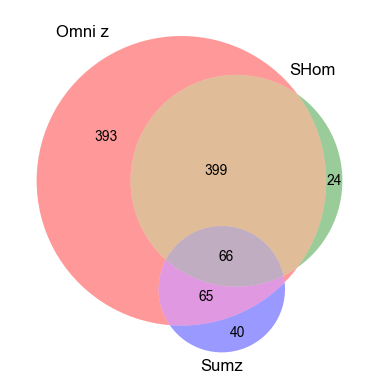

In [281]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (393, 24 , 399 , 40, 65, 5,66), set_labels = ('Omni z', 'SHom', 'Sumz'))
plt.show()

In [282]:
!pip install venn

In [285]:
!pip install more-itertools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 1.7 MB/s eta 0:00:00


In [293]:
df_omni_sig_noval[['CHR', 'BP']]

,CHR,BP
0,1,910174
1,1,933045
2,1,1520725
3,1,1521805
4,1,1522006
...,...,...
47683,22,48871624
47684,22,48874310
47685,22,48874412
47686,22,48874685


In [296]:
df_novals = {}

In [323]:
df_novals["omni z"] = set(df_omni_sig_noval['CHR'].astype(str) +"-"+ df_omni_sig_noval["BP"].astype(str))

In [325]:
df_novals["sum z"] = set(df_sum_z_sig_noval['CHR'].astype(str) +"-"+ df_sum_z_sig_noval["BP"].astype(str))

In [326]:
df_novals["SHet"] = set(df_SHet_sig_noval['CHR'].astype(str) +"-"+ df_SHet_sig_noval["BP"].astype(str))

In [327]:
df_novals["SHom"] = set(df_SHom_sig_noval['CHR'].astype(str) +"-"+ df_SHom_sig_noval["BP"].astype(str))

In [330]:
len(df_novals)

4

In [354]:
df_novals_3 = {}

In [349]:
df_novals_3['omni z'] = df_novals['omni z']

In [355]:
df_novals_3['sum z'] = df_novals['sum z']

In [356]:
df_novals_3['SHet'] = df_novals['SHet']

In [357]:
df_novals_3['SHom'] = df_novals['SHom']

<Axes: >

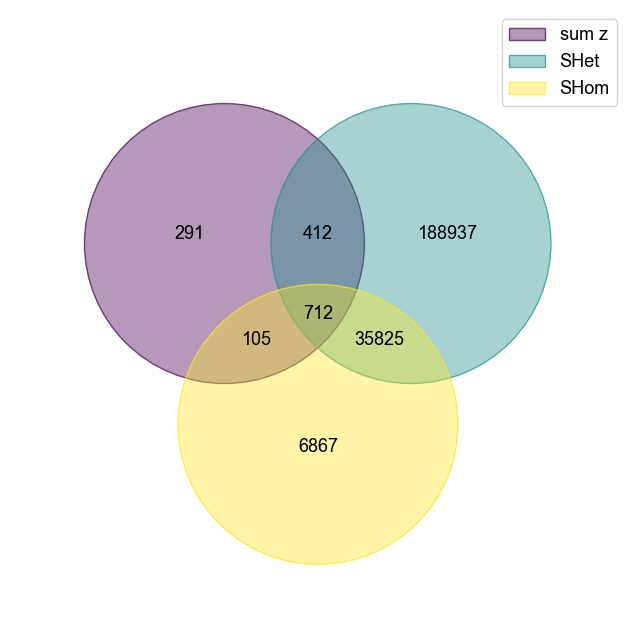

In [358]:
from venn import venn
from itertools import islice
from string import ascii_uppercase
from numpy.random import choice
venn(df_novals_3)

<Axes: >

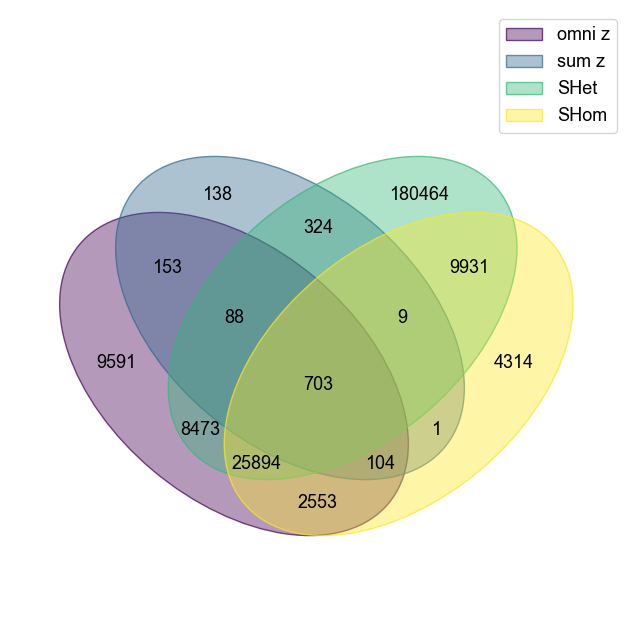

In [347]:
venn(df_novals)

In [248]:
df_sum_z_sig_noval

In [256]:
df_omni_SHet_SHom

In [257]:
df_GCN

In [258]:
df_GCN_lookup = df_GCN.rename(columns={"chromosome": "CHR", "base_pair_location": "BP"})

In [259]:
df_GCN_lookup = df_GCN_lookup[["CHR", "BP", "effect_allele", "other_allele", "p_value"]]

In [260]:
df_GCN_lookup

In [261]:
df_omni_SHet_SHom = df_omni_SHet_SHom.reset_index().drop(columns='index')

In [262]:
ind = df_GCN_lookup.CHR.isin(df_omni_SHet_SHom.CHR) & df_omni_SHet_SHom.CHR.isin(df_GCN_lookup.CHR) & df_GCN_lookup.BP.isin(df_omni_SHet_SHom.BP) & df_GCN_lookup.BP.isin(df_omni_SHet_SHom.BP)
df_gcn_joint = df_GCN_lookup[ind].append(df_omni_SHet_SHom[ind])
df_gcn_joint

In [265]:
df_gcn_joint[df_gcn_joint.p_value < 1e-8]

In [275]:
df_SHom_sig_noval_non_overlap_SHet = []
for chrm, bp, ea, oa, p in df_SHom_sig_noval[:].to_numpy():
    df_SHet_sig_noval_loci = df_SHet_sig_noval[(df_SHet_sig_noval.CHR == chrm)&(df_SHet_sig_noval.BP > bp - 5e+5) & (df_SHet_sig_noval.BP < bp + 5e+5)]
    if df_SHet_sig_noval_loci.empty:
        df_SHom_sig_noval_non_overlap_SHet.append([chrm, bp, ea, oa, p])  
    else:
        print(df_SHet_sig_noval_loci)

In [273]:
df_SHet_sig_noval

In [278]:
df_SHet_sig_noval_non_overlap_SHet = []
for chrm, bp, ea, oa, p in df_SHet_sig_noval[:].to_numpy():
    df_SHom_sig_noval_loci = df_SHom_sig_noval[(df_SHom_sig_noval.CHR == chrm)&(df_SHom_sig_noval.BP > bp - 5e+5) & (df_SHom_sig_noval.BP < bp + 5e+5)]
    if df_SHom_sig_noval_loci.empty:
        df_SHet_sig_noval_non_overlap_SHet.append([chrm, bp, ea, oa, p])  
    else:
        print(df_SHom_sig_noval_loci)

In [280]:
len(df_SHet_sig_noval_non_overlap_SHet)

In [281]:
df_SHet_sig_noval_non_overlap_SHom = df_SHet_sig_noval_non_overlap_SHet

In [282]:
df_SHet_sig_noval_non_overlap_SHom = pd.DataFrame(df_SHet_sig_noval_non_overlap_SHom, columns = ['CHR','BP','effect_allele', 'other_allele', 'p_value'])

In [283]:
df_SHet_sig_noval_non_overlap_SHom

In [284]:
_,SHet_sig_noval_total_non_overlap_SHom = count_suggestive_loci_counts(df_SHet_sig_noval_non_overlap_SHom, "", 5e-8)

In [285]:
SHet_sig_noval_total_non_overlap_SHom

In [274]:
df_SHom_sig_noval

In [276]:
df_SHom_sig_noval_non_overlap_SHet

In [288]:
df_omni_sig_noval

In [289]:
df_SHom_sig_noval

In [290]:
df_SHet_sig_noval_non_overlap_Omni = []
df_SHet_sig_noval_non_overlap_SHom = []
df_SHet_sig_noval_non_overlap = []
for chrm, bp, ea, oa, p in df_SHet_sig_noval[:].to_numpy():
    df_omni_sig_noval_loci = df_omni_sig_noval[(df_omni_sig_noval.CHR == chrm)&(df_omni_sig_noval.BP > bp - 5e+5) & (df_omni_sig_noval.BP < bp + 5e+5)]
    df_SHom_sig_noval_loci = df_SHom_sig_noval[(df_SHom_sig_noval.CHR == chrm)&(df_SHom_sig_noval.BP > bp - 5e+5) & (df_SHom_sig_noval.BP < bp + 5e+5)]
    if df_omni_sig_noval_loci.empty and df_SHom_sig_noval_loci.empty:
        df_SHet_sig_noval_non_overlap.append([chrm, bp, ea, oa, p])  
    if df_omni_sig_noval_loci.empty:
        df_SHet_sig_noval_non_overlap_Omni.append([chrm, bp, ea, oa, p])  
    elif df_SHom_sig_noval_loci.empty:
        df_SHet_sig_noval_non_overlap_SHom.append([chrm, bp, ea, oa, p])  
       

In [ ]:
df_SHom_sig_noval_non_overlap_Omni = []
for chrm, bp, ea, oa, p in df_SHom_sig_noval[:].to_numpy():
    df_Omni_sig_noval_loci = df_omni_sig_noval[(df_omni_sig_noval.CHR == chrm)&(df_omni_sig_noval.BP > bp - 5e+5) & (df_omni_sig_noval.BP < bp + 5e+5)]
    if df_Omni_sig_noval_loci.empty:
        df_SHom_sig_noval_non_overlap_Omni.append([chrm, bp, ea, oa, p])  

In [367]:
df_GCN

,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,p_value,HET
0,1,565111,T,C,0.9887,0.4258,0.2046,0.03744,1.00000
1,1,565469,T,C,0.0123,0.0300,0.2043,0.88330,1.00000
2,1,604779,A,T,0.9995,0.8695,0.9761,0.37300,1.00000
3,1,693731,A,G,0.8456,-0.0073,0.0327,0.82320,0.01563
4,1,706368,A,G,0.4895,0.0275,0.0306,0.36890,0.21300
...,...,...,...,...,...,...,...,...,...
17042641,22,51236138,A,G,0.0005,-0.3780,0.7090,0.59400,1.00000
17042642,22,51237063,T,C,0.7089,0.0134,0.0185,0.46910,0.54610
17042643,22,51238513,C,G,0.9992,0.3028,0.4478,0.49900,0.81620
17042644,22,51239586,T,G,0.9955,0.0302,0.1299,0.81650,0.22630


In [382]:
df_omni_sig_noval[]

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
0,1,910174,T,C,11.367550,1.527988,-0.875197,0.611785,0.451613,-0.056916,4.903740e-26
1,1,933045,T,C,7.853698,0.935271,0.618506,0.031962,-3.087678,-0.785771,1.728542e-13
2,1,1520725,T,C,0.020000,-0.581395,0.558140,-1.862069,-8.227273,0.372093,4.871140e-13
3,1,1521805,A,G,-0.160000,-0.102564,-1.083333,1.930233,7.409091,0.100000,2.071730e-10
4,1,1522006,T,C,0.220000,0.102564,0.972222,-1.900000,-7.409091,0.005882,2.340603e-10
...,...,...,...,...,...,...,...,...,...,...,...
47683,22,48871624,A,G,-0.238095,-0.263158,-0.214286,2.530303,6.944444,1.000000,5.750789e-09
47684,22,48874310,T,C,-0.142857,-0.157895,-0.142857,2.621212,6.736842,1.006452,2.029264e-08
47685,22,48874412,T,G,-0.285714,-0.052632,0.214286,2.584615,6.684211,0.896774,3.338015e-08
47686,22,48874685,A,G,0.285714,0.052632,-0.214286,-2.584615,-6.631579,-0.896774,4.554419e-08


In [383]:
df_novals

{'omni z': {'2-208300941',
  '10-65188318',
  '4-140935264',
  '13-96988839',
  '2-219121663',
  '7-77332058',
  '5-107785007',
  '7-32307925',
  '1-72535285',
  '3-88184681',
  '4-25410485',
  '7-77349936',
  '20-25320228',
  '10-89795668',
  '22-37489730',
  '2-35425355',
  '16-4922201',
  '2-147946069',
  '11-85230491',
  '1-97409943',
  '6-34393845',
  '11-116747282',
  '1-174721410',
  '10-118589179',
  '20-15838024',
  '10-87524723',
  '10-113010516',
  '12-102780879',
  '17-80635345',
  '11-13296401',
  '9-15642883',
  '2-111879415',
  '12-48539482',
  '9-11384213',
  '4-20178958',
  '2-208253986',
  '3-82654171',
  '4-20158666',
  '15-51871461',
  '1-174057376',
  '17-80872458',
  '8-87315295',
  '20-6555461',
  '4-161778423',
  '11-130868583',
  '1-174811547',
  '11-132700741',
  '3-128983960',
  '3-94206234',
  '2-229006208',
  '3-136517154',
  '3-136065720',
  '1-23419855',
  '2-172591944',
  '18-31266448',
  '7-93193242',
  '18-21186898',
  '5-95737464',
  '4-162069403',
  

In [384]:
omni_set = df_novals['omni z']
omni_set

{'2-208300941',
 '10-65188318',
 '4-140935264',
 '13-96988839',
 '2-219121663',
 '7-77332058',
 '5-107785007',
 '7-32307925',
 '1-72535285',
 '3-88184681',
 '4-25410485',
 '7-77349936',
 '20-25320228',
 '10-89795668',
 '22-37489730',
 '2-35425355',
 '16-4922201',
 '2-147946069',
 '11-85230491',
 '1-97409943',
 '6-34393845',
 '11-116747282',
 '1-174721410',
 '10-118589179',
 '20-15838024',
 '10-87524723',
 '10-113010516',
 '12-102780879',
 '17-80635345',
 '11-13296401',
 '9-15642883',
 '2-111879415',
 '12-48539482',
 '9-11384213',
 '4-20178958',
 '2-208253986',
 '3-82654171',
 '4-20158666',
 '15-51871461',
 '1-174057376',
 '17-80872458',
 '8-87315295',
 '20-6555461',
 '4-161778423',
 '11-130868583',
 '1-174811547',
 '11-132700741',
 '3-128983960',
 '3-94206234',
 '2-229006208',
 '3-136517154',
 '3-136065720',
 '1-23419855',
 '2-172591944',
 '18-31266448',
 '7-93193242',
 '18-21186898',
 '5-95737464',
 '4-162069403',
 '5-154698190',
 '3-85669226',
 '2-101011877',
 '6-120107560',
 '16-722

In [385]:
sumz_set = df_novals['sum z']
sumz_set

{'10-65120962',
 '10-65188318',
 '22-18147281',
 '12-30205097',
 '10-64888493',
 '22-23054462',
 '13-19037838',
 '7-73045483',
 '1-6783053',
 '2-228979510',
 '3-136300732',
 '7-72976123',
 '7-73012785',
 '10-65016174',
 '1-26694952',
 '17-80893992',
 '17-44014433',
 '16-28527221',
 '9-76580683',
 '10-65247609',
 '16-28881202',
 '2-169784413',
 '16-28865042',
 '2-229006208',
 '2-169796187',
 '17-80693281',
 '10-65138573',
 '3-56947994',
 '16-28558081',
 '2-228999900',
 '17-80687555',
 '16-28613965',
 '16-28859802',
 '4-66940416',
 '19-54755602',
 '2-169703974',
 '10-89620210',
 '16-28870596',
 '17-80732263',
 '8-134510545',
 '7-90790216',
 '2-228996637',
 '10-65214571',
 '10-87722879',
 '10-65347105',
 '17-80895253',
 '16-28593597',
 '3-68606538',
 '2-228993349',
 '15-22407748',
 '16-28517709',
 '17-80918202',
 '16-28844365',
 '17-80931758',
 '2-228977382',
 '16-28897452',
 '8-16670957',
 '10-65201926',
 '16-28526897',
 '2-228992134',
 '16-28853996',
 '2-169738404',
 '8-123433789',
 '2-

In [386]:
SHet_set = df_novals['SHet']
SHet_set

{'2-208300941',
 '8-135799294',
 '1-4265454',
 '9-1928825',
 '3-126988390',
 '5-27253718',
 '20-6493952',
 '13-96988839',
 '16-31195965',
 '13-113447230',
 '12-94685655',
 '6-39332567',
 '7-19789383',
 '3-32420186',
 '3-88184681',
 '5-146795425',
 '1-26872809',
 '14-96394947',
 '12-110629266',
 '9-113401756',
 '16-4922201',
 '2-229911899',
 '12-57115495',
 '6-83399086',
 '22-38743302',
 '15-51514572',
 '1-97409943',
 '15-55693839',
 '11-116747282',
 '10-105454068',
 '4-77029413',
 '10-118786961',
 '22-38553411',
 '9-11750576',
 '7-17207873',
 '5-107832598',
 '15-49481671',
 '3-45632221',
 '16-28616912',
 '2-132926666',
 '3-114306081',
 '3-188850974',
 '14-42917433',
 '9-11384213',
 '19-39714956',
 '18-9253155',
 '2-133589648',
 '21-40303677',
 '6-45225761',
 '6-101063149',
 '16-18969742',
 '16-48712980',
 '6-157946538',
 '1-83165162',
 '4-82274684',
 '9-11618444',
 '23-154921994',
 '15-59977631',
 '11-56142399',
 '2-63630117',
 '18-21663376',
 '14-74999138',
 '6-100935819',
 '17-784446

In [387]:
SHom_set = df_novals['SHom']
SHom_set

{'2-208300941',
 '10-65188318',
 '4-140935264',
 '13-96988839',
 '8-14158080',
 '3-161479873',
 '5-107785007',
 '7-32307925',
 '1-72535285',
 '3-88184681',
 '4-25410485',
 '10-98974849',
 '6-143167564',
 '2-35425355',
 '16-4922201',
 '2-147946069',
 '1-32164206',
 '1-97409943',
 '1-174721410',
 '3-157847341',
 '10-118589179',
 '20-15838024',
 '14-46833927',
 '5-107832598',
 '11-13296401',
 '9-15642883',
 '3-114306081',
 '5-43135138',
 '9-11384213',
 '4-20178958',
 '2-208253986',
 '3-82654171',
 '4-20158666',
 '5-107434101',
 '15-51871461',
 '1-174057376',
 '11-130868583',
 '1-174811547',
 '11-132700741',
 '2-236823985',
 '3-94206234',
 '2-229006208',
 '3-136517154',
 '3-136065720',
 '7-114363566',
 '1-23419855',
 '2-172591944',
 '2-147880668',
 '17-78444658',
 '18-31266448',
 '18-21186898',
 '16-62856907',
 '4-162069403',
 '3-85669226',
 '2-101011877',
 '16-72256903',
 '19-18231779',
 '1-47679486',
 '3-90302223',
 '1-1865298',
 '3-85621395',
 '16-24795959',
 '4-20345175',
 '11-85079419

In [477]:
omni_set_unique = omni_set.difference(sumz_set,SHet_set, SHom_set)

In [482]:
omni_set_unique_list = []
for val in omni_set_unique:
    values = val.split('-')
    values = [int(i) for i in values]
    omni_set_unique_list.append(tuple(values))

In [483]:
df_omni_unique_sig_noval = df_omni_sig_noval[df_omni_sig_noval[["CHR","BP"]].apply(tuple, 1).isin(pd.Series(omni_set_unique_list))]

In [488]:
df_omni_unique_sig_noval.sort_values(by='p_value')[:1]

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
43985,17,80707827,A,G,0.1,0.0,18.642857,-0.298507,-0.9,1.23125,1.124424e-74


In [489]:
most_sig_omni_unique = df_omni_unique_sig_noval.sort_values(by='p_value')[:1]

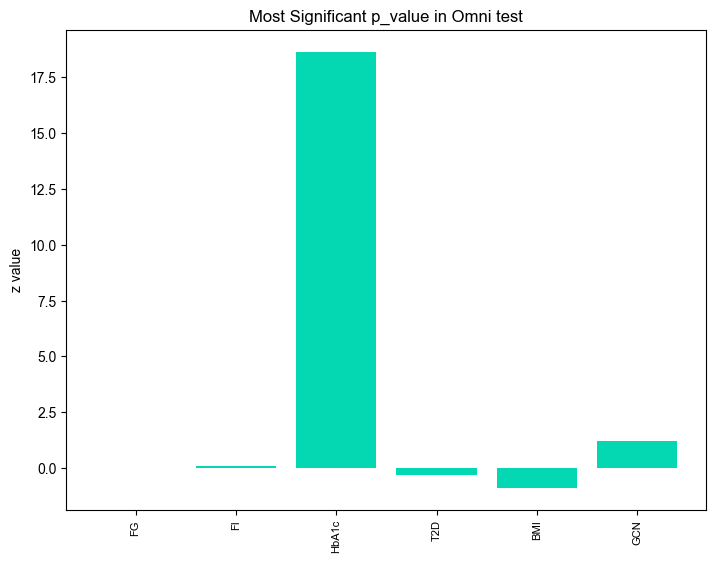

In [490]:
plot_most_sig_snp(most_sig_omni_unique , 'Most Significant p_value in Omni test')

In [478]:
sumz_set_unique = sumz_set.difference(omni_set,SHet_set, SHom_set)

In [491]:
sumz_set_unique_list = []
for val in sumz_set_unique:
    values = val.split('-')
    values = [int(i) for i in values]
    sumz_set_unique_list.append(tuple(values))

In [492]:
df_sumz_unique_sig_noval = df_sum_z_sig_noval[df_sum_z_sig_noval[["CHR","BP"]].apply(tuple, 1).isin(pd.Series(sumz_set_unique_list))]

In [496]:
df_sumz_unique_sig_noval.sort_values(by='p_value')

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
1026,14,106321330,A,G,16.075245,14.021197,0.059896,NaN,-1.526480,NaN,3.183009e-16
981,12,30143848,T,G,0.363271,0.220446,27.931102,NaN,-1.247191,NaN,7.389601e-15
1457,21,14834043,T,C,17.258599,10.163030,-0.492199,NaN,0.730909,-0.865136,2.124188e-14
142,1,249215865,A,G,16.241166,5.915367,3.950745,NaN,0.391858,-0.390863,9.552781e-14
1483,22,23053827,T,G,18.630769,6.948598,-0.195318,NaN,0.043924,NaN,4.079435e-13
...,...,...,...,...,...,...,...,...,...,...,...
489,2,242611326,T,G,-13.436524,-6.092342,NaN,NaN,0.346457,NaN,4.463489e-08
549,5,112239205,A,G,7.937500,10.042537,-0.181001,NaN,1.382591,NaN,4.469111e-08
528,4,20586360,T,C,-1.727149,-1.522546,-15.674467,NaN,-0.232033,NaN,4.655746e-08
138,1,236228558,A,C,-5.316735,-4.710345,-7.993631,NaN,-1.122497,NaN,4.753946e-08


In [497]:
most_sig_sumz_unique = df_sumz_unique_sig_noval.sort_values(by='p_value')[:1]

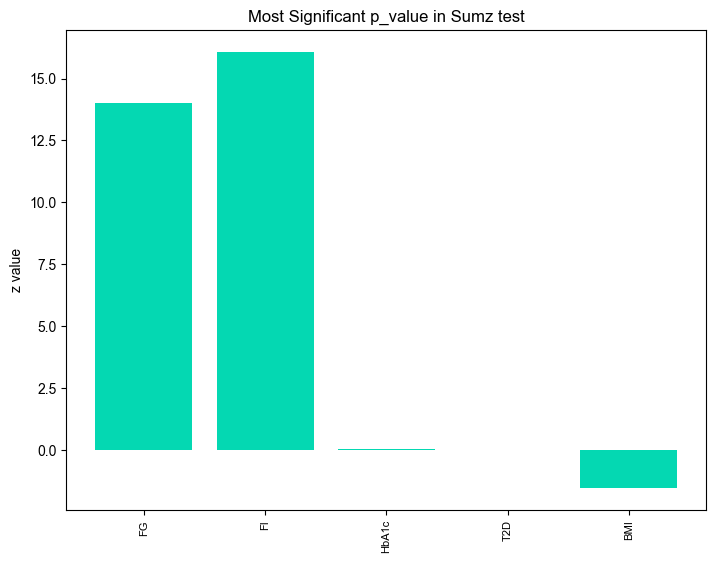

In [513]:
plot_most_sig_snp(most_sig_sumz_unique , 'Most Significant p_value in Sumz test')

In [500]:
SHet_set_unique = SHet_set.difference(omni_set,sumz_set, SHom_set)

In [501]:
SHet_set_unique_list = []
for val in SHet_set_unique:
    values = val.split('-')
    values = [int(i) for i in values]
    SHet_set_unique_list.append(tuple(values))

In [503]:
df_SHet_unique_sig_noval = df_SHet_sig_noval[df_SHet_sig_noval[["CHR","BP"]].apply(tuple, 1).isin(pd.Series(SHet_set_unique_list))]

In [505]:
df_SHet_unique_sig_noval.sort_values(by='p_value')

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
104215,6,155571817,A,G,12.207149,-13.313346,NaN,NaN,NaN,NaN,1.487335e-84
143729,10,91843070,C,G,-11.797368,13.540456,NaN,NaN,NaN,NaN,8.282440e-84
106149,7,11253490,T,C,11.581262,-13.537706,NaN,NaN,NaN,NaN,1.323788e-82
134957,9,108029465,C,G,11.418567,-13.538885,NaN,NaN,NaN,NaN,1.001172e-81
134958,9,108031125,A,C,-11.418567,13.538885,NaN,NaN,NaN,NaN,1.001172e-81
...,...,...,...,...,...,...,...,...,...,...,...
136722,9,127552705,T,C,-5.425726,-0.044048,0.657160,NaN,NaN,NaN,4.999316e-08
21268,2,29719357,A,G,-0.476190,-1.421053,0.200000,0.300000,4.210526,0.605882,4.999700e-08
102182,6,123777669,A,G,0.814815,1.869565,0.235294,1.072289,5.000000,1.000000,4.999761e-08
60111,3,182189744,T,C,-0.180358,-0.636388,6.700846,NaN,-2.143302,NaN,4.999776e-08


In [506]:
most_sig_SHet_unique = df_SHet_unique_sig_noval.sort_values(by='p_value')[:1]

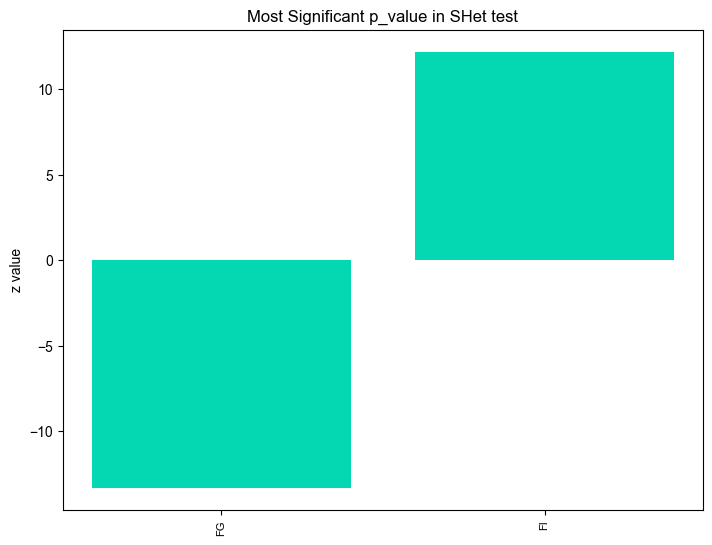

In [514]:
plot_most_sig_snp(most_sig_SHet_unique , 'Most Significant p_value in SHet test')

In [515]:
SHom_set_unique = SHom_set.difference(omni_set,sumz_set, SHet_set)

In [516]:
SHom_set_unique_list = []
for val in SHom_set_unique:
    values = val.split('-')
    values = [int(i) for i in values]
    SHom_set_unique_list.append(tuple(values))

In [517]:
df_SHom_unique_sig_noval = df_SHom_sig_noval[df_SHom_sig_noval[["CHR","BP"]].apply(tuple, 1).isin(pd.Series(SHom_set_unique_list))]

In [518]:
df_SHom_unique_sig_noval

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
122,1,6569286,A,T,-1.523810,-1.947368,-2.928571,-3.738462,-5.000000,-1.107595,1.608558e-05
123,1,6623499,T,C,-1.521739,-1.800000,-3.200000,-3.523077,-4.611111,-0.943038,6.541555e-05
125,1,6645867,A,G,0.750000,-1.000000,-1.571429,-3.147059,-5.529412,-0.077844,3.271452e-07
127,1,6652718,A,G,0.450000,1.611111,2.000000,4.611940,4.850000,0.440994,1.446885e-04
132,1,6657964,T,C,-0.600000,-1.388889,-2.071429,-4.686567,-5.200000,-0.403727,3.484356e-05
...,...,...,...,...,...,...,...,...,...,...,...
43487,22,19984277,T,C,0.363636,2.250000,2.866667,3.323944,5.000000,-0.694611,4.631383e-06
43488,22,19987202,T,G,0.086957,2.200000,2.866667,3.267606,5.000000,-0.700599,4.488731e-06
43489,22,19988167,A,G,0.260870,2.200000,2.933333,3.226667,5.000000,-0.760479,2.813904e-06
43495,22,20116015,T,G,-1.000000,0.684211,2.642857,2.892308,5.444444,-0.254777,4.553738e-07


In [519]:
most_sig_SHom_unique = df_SHom_unique_sig_noval.sort_values(by='p_value')[:1]

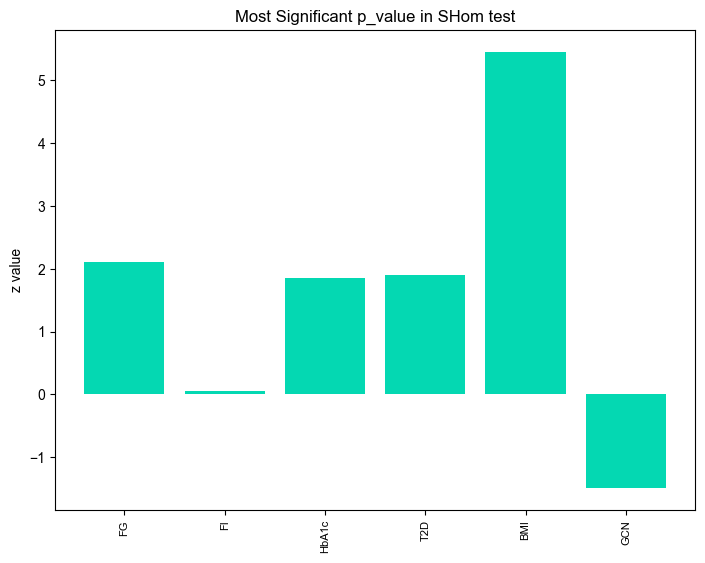

In [520]:
plot_most_sig_snp(most_sig_SHom_unique , 'Most Significant p_value in SHom test')

In [388]:
set1 = omni_set.intersection(sumz_set)         #[80, 20, 100]
set1

{'10-65120962',
 '10-65188318',
 '16-28535305',
 '2-228983546',
 '17-80823758',
 '10-65101207',
 '17-80953213',
 '2-228992850',
 '10-64905113',
 '2-169748843',
 '2-169776139',
 '7-73030175',
 '7-73043665',
 '2-228996438',
 '2-169780366',
 '6-135419018',
 '10-64888493',
 '10-65330208',
 '17-80707896',
 '2-169780885',
 '7-73045483',
 '2-169776360',
 '16-28519096',
 '2-228979510',
 '1-72853409',
 '2-228975064',
 '17-80693899',
 '2-228995185',
 '16-28507644',
 '2-228983992',
 '16-28861881',
 '10-65091110',
 '3-136300732',
 '7-72976123',
 '7-73012785',
 '2-228994423',
 '10-65134778',
 '2-228996470',
 '1-72901515',
 '17-80913094',
 '16-28569764',
 '16-28839392',
 '16-28832382',
 '10-64999490',
 '10-89613319',
 '10-65016174',
 '2-228971884',
 '16-28840381',
 '2-169776414',
 '2-228973660',
 '2-228996116',
 '7-73022746',
 '16-28867804',
 '1-158577109',
 '17-80893992',
 '16-28606160',
 '1-72752939',
 '3-141136915',
 '16-28495752',
 '16-28868695',
 '2-169792188',
 '2-169763148',
 '7-72921609',
 '

In [389]:
set2 = set1.intersection(SHet_set)  

In [391]:
result_set = set2.intersection(SHom_set)

In [393]:
len(result_set)

703

In [397]:
gcn_set = set(df_GCN['chromosome'].astype(str) +"-"+ df_GCN["base_pair_location"].astype(str))

In [398]:
gcn_set

{'16-74538065',
 '6-154298282',
 '4-137202739',
 '7-127863275',
 '4-130664077',
 '4-138866675',
 '12-39791466',
 '13-87844713',
 '3-138864255',
 '10-63737962',
 '2-174806767',
 '11-79561537',
 '15-95274583',
 '2-50097335',
 '18-63179338',
 '5-37498762',
 '2-789251',
 '3-63178023',
 '9-6835419',
 '14-34055658',
 '6-30971878',
 '5-166345789',
 '9-120609716',
 '20-60560304',
 '6-26317406',
 '6-104282355',
 '3-50771907',
 '13-77046745',
 '9-77851774',
 '8-30476617',
 '9-120433619',
 '12-47455960',
 '13-75058959',
 '14-50501095',
 '5-100887461',
 '6-5105272',
 '10-127096209',
 '18-55199532',
 '2-225643667',
 '13-35552437',
 '11-124276332',
 '21-24615744',
 '22-32266884',
 '2-208991533',
 '3-52573152',
 '4-107402869',
 '2-213210992',
 '5-87418934',
 '3-86717760',
 '5-8265526',
 '1-210714436',
 '10-68920384',
 '6-72550724',
 '8-106883364',
 '8-22214211',
 '5-129476306',
 '3-24425376',
 '3-148364110',
 '3-9849060',
 '13-100971063',
 '2-74786814',
 '5-142190069',
 '10-30311273',
 '4-58410077',


In [400]:
gcn_with_tests = gcn_set.intersection(result_set)

In [460]:
gcn_with_omni = gcn_set.intersection(omni_set)

In [461]:
len(gcn_with_omni)

47559

In [462]:
gcn_omni_list = []
for val in gcn_with_omni:
    values = val.split('-')
    values = [int(i) for i in values]
    gcn_omni_list.append(tuple(values))

In [464]:
df_GCN_omni_sig = df_GCN[df_GCN[["chromosome","base_pair_location"]].apply(tuple, 1).isin(pd.Series(gcn_omni_list))]

In [465]:
df_GCN_omni_sig

,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,p_value,HET
1303,1,910174,T,C,0.0095,-0.0086,0.1511,0.9547,0.90300
1509,1,933045,T,C,0.0010,-0.3976,0.5060,0.4320,1.00000
6080,1,1520725,T,C,0.4091,0.0064,0.0172,0.7113,0.02230
6086,1,1521805,A,G,0.5505,0.0017,0.0170,0.9214,0.01916
6087,1,1522006,T,C,0.4479,0.0001,0.0170,0.9936,0.02026
...,...,...,...,...,...,...,...,...,...
17022515,22,48871624,A,G,0.4040,0.0156,0.0156,0.3187,0.65820
17022546,22,48874310,T,C,0.4085,0.0156,0.0155,0.3152,0.72140
17022547,22,48874412,T,G,0.4347,0.0139,0.0155,0.3681,0.43210
17022549,22,48874685,A,G,0.5653,-0.0139,0.0155,0.3675,0.43260


In [470]:
df_GCN_omni_sig.sort_values(by = ['p_value'])[:10]

,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,p_value,HET
1449285,2,17626707,T,C,0.6938,0.0873,0.0168,1.988000e-07,0.9333
1449327,2,17634055,C,G,0.3063,-0.0872,0.0168,2.080000e-07,0.9288
1449315,2,17631634,T,C,0.6937,0.0872,0.0168,2.080000e-07,0.9288
1449291,2,17627814,C,G,0.6938,0.0869,0.0168,2.277000e-07,0.9318
1449271,2,17624482,A,G,0.6932,0.0866,0.0168,2.437000e-07,0.9211
1449282,2,17626262,C,G,0.6931,0.0866,0.0168,2.488000e-07,0.9253
1449321,2,17633207,A,G,0.3066,-0.0863,0.0168,2.804000e-07,0.9322
1449373,2,17641617,A,G,0.6941,0.0863,0.0168,2.852000e-07,0.9427
1449402,2,17646201,T,G,0.3058,-0.0863,0.0168,2.861000e-07,0.9440
1449401,2,17646019,A,G,0.3058,-0.0863,0.0168,2.861000e-07,0.9440


In [467]:
most_sig_gcn = df_omni_sig_noval[(df_omni_sig_noval.CHR == 2) & (df_omni_sig_noval.BP == 17626707 )]
most_sig_gcn

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
5895,2,17626707,T,C,-0.863636,-3.6,-0.733333,-2.042857,3.619048,5.196429,3.233575e-11


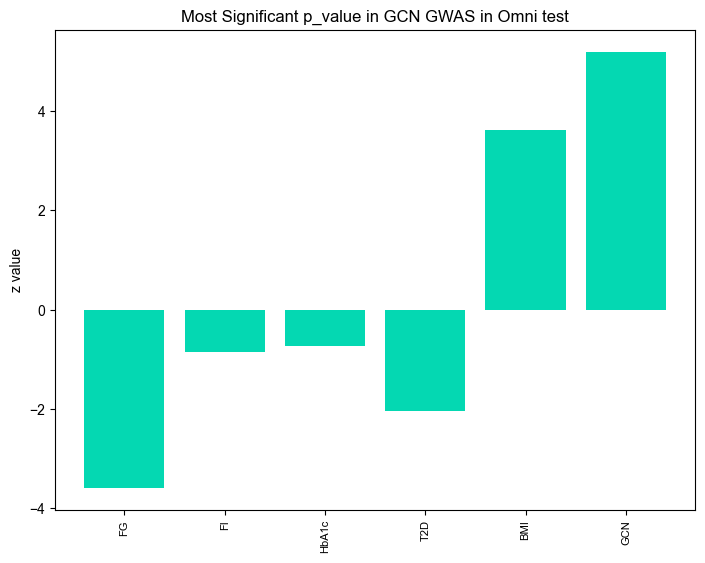

In [468]:
plot_most_sig_snp(most_sig_gcn , 'Most Significant p_value in GCN GWAS in Omni test')

In [402]:
len(gcn_with_tests)

703

In [426]:
gcn_val_list = []
for val in gcn_with_tests:
    values = val.split('-')
    values = [int(i) for i in values]
    gcn_val_list.append(tuple(values))
    

In [431]:
pd.Series(gcn_val_list)

0      (16, 28535305)
1      (10, 65188318)
2      (2, 228983546)
3      (10, 65101207)
4      (2, 228992850)
            ...      
698     (7, 72866616)
699    (10, 65350383)
700    (2, 228990498)
701    (17, 21261560)
702    (16, 28550667)
Length: 703, dtype: object

In [ ]:
df[df[["A","B"]].apply(tuple, 1).isin(AB_col)]

In [434]:
df_GCN_test_sig = df_GCN[df_GCN[["chromosome","base_pair_location"]].apply(tuple, 1).isin(pd.Series(gcn_val_list))]

In [435]:
df_GCN_test_sig

,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,p_value,HET
421683,1,72565800,A,G,0.8408,0.0164,0.0212,0.4384,0.8665
421910,1,72611715,T,C,0.8423,0.0199,0.0212,0.3483,0.8900
422455,1,72723211,A,T,0.1728,-0.0153,0.0204,0.4549,0.8561
422460,1,72724409,A,C,0.8271,0.0143,0.0204,0.4826,0.8536
422526,1,72738699,T,C,0.8270,0.0145,0.0204,0.4760,0.8512
...,...,...,...,...,...,...,...,...,...
15033478,17,21261560,T,C,0.4654,0.0178,0.0212,0.4007,0.5217
15033486,17,21263163,C,G,0.4720,0.0101,0.0157,0.5193,0.3311
15033490,17,21263693,C,G,0.4717,0.0096,0.0157,0.5419,0.3620
15033492,17,21264396,T,C,0.4716,0.0080,0.0157,0.6092,0.2989


In [472]:
df_GCN_test_sig.sort_values(by = ['p_value'])[:20]

,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,p_value,HET
8177812,7,112930495,A,G,0.6801,-0.0717,0.0221,0.001180,0.383200
8178051,7,112978243,T,C,0.5746,0.0615,0.0208,0.003079,0.786900
9569365,9,16715826,T,C,0.3435,0.0581,0.0220,0.008210,0.121600
10576264,10,65365736,C,G,0.2583,0.0457,0.0177,0.009866,0.013790
3638915,3,135726679,A,G,0.7543,-0.0432,0.0180,0.016500,0.374200
10576294,10,65374109,T,C,0.2555,0.0419,0.0178,0.018600,0.038460
10576305,10,65376496,C,G,0.7444,-0.0417,0.0178,0.019000,0.038050
10576321,10,65379304,A,G,0.2556,0.0415,0.0178,0.019450,0.038530
10576363,10,65389209,C,G,0.2559,0.0414,0.0177,0.019750,0.039750
10576281,10,65370897,A,C,0.2556,0.0413,0.0178,0.020210,0.034760


In [445]:
most_sig_gcn = df_omni_sig_noval[(df_omni_sig_noval.CHR == 7) & (df_omni_sig_noval.BP == 112930495 )]
most_sig_gcn

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
27065,7,112930495,A,G,-3.3,-0.944444,-0.642857,-3.073529,-8.529412,-3.244344,3.424616e-18


In [451]:
most_sig_gcn2 = df_omni_sig_noval[(df_omni_sig_noval.CHR == 7) & (df_omni_sig_noval.BP == 112978243 )]
most_sig_gcn2

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
27124,7,112978243,T,C,2.15,1.166667,0.230769,3.076923,9.941176,2.956731,4.772224e-22


In [452]:
most_sig_gcn3 = df_omni_sig_noval[(df_omni_sig_noval.CHR == 9) & (df_omni_sig_noval.BP == 16715826 )]
most_sig_gcn3

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
30473,9,16715826,T,C,2.0,0.888889,3.357143,2.925373,7.5,2.640909,2.030108e-14


In [453]:
most_sig_gcn4 = df_omni_sig_noval[(df_omni_sig_noval.CHR == 10) & (df_omni_sig_noval.BP == 65365736 )]
most_sig_gcn4

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
32551,10,65365736,C,G,2.173913,4.9,2.75,3.931507,5.6,2.581921,4.062319e-13


In [454]:
most_sig_gcn5 = df_omni_sig_noval[(df_omni_sig_noval.CHR == 3) & (df_omni_sig_noval.BP == 135726679 )]
most_sig_gcn5

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
15436,3,135726679,A,G,-3.090909,-0.526316,-2.266667,-3.876712,-7.631579,-2.4,5.826430e-15


In [473]:
most_sig_gcn12 = df_omni_sig_noval[(df_omni_sig_noval.CHR == 2) & (df_omni_sig_noval.BP == 169763148 )]
most_sig_gcn5

,CHR,BP,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_value
15436,3,135726679,A,G,-3.090909,-0.526316,-2.266667,-3.876712,-7.631579,-2.4,5.826430e-15


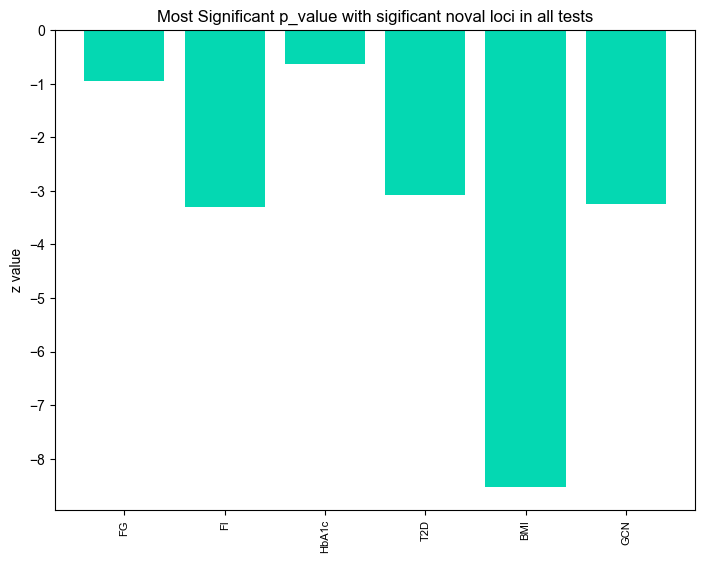

In [455]:
plot_most_sig_snp(most_sig_gcn , 'Most Significant p_value with sigificant noval loci in all tests')

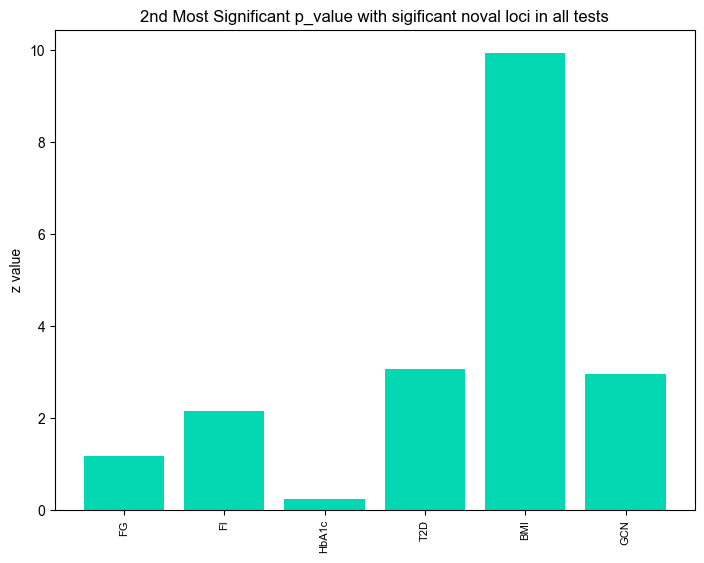

In [456]:
plot_most_sig_snp(most_sig_gcn2 , '2nd Most Significant p_value with sigificant noval loci in all tests')

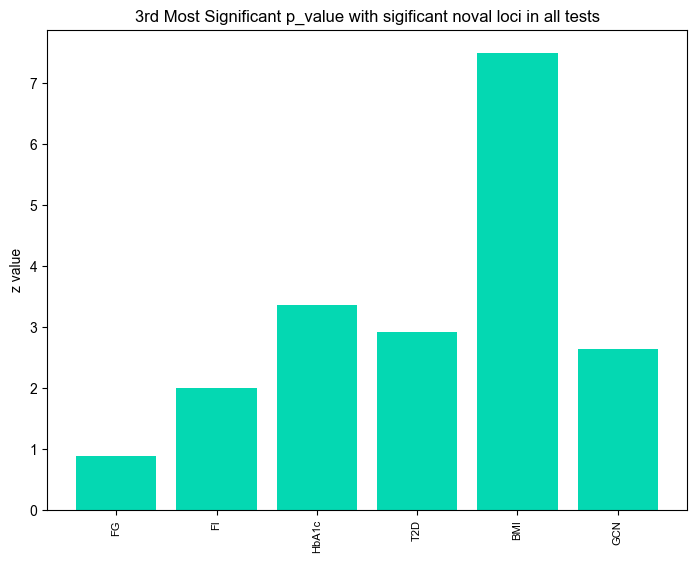

In [457]:
plot_most_sig_snp(most_sig_gcn3 , '3rd Most Significant p_value with sigificant noval loci in all tests')

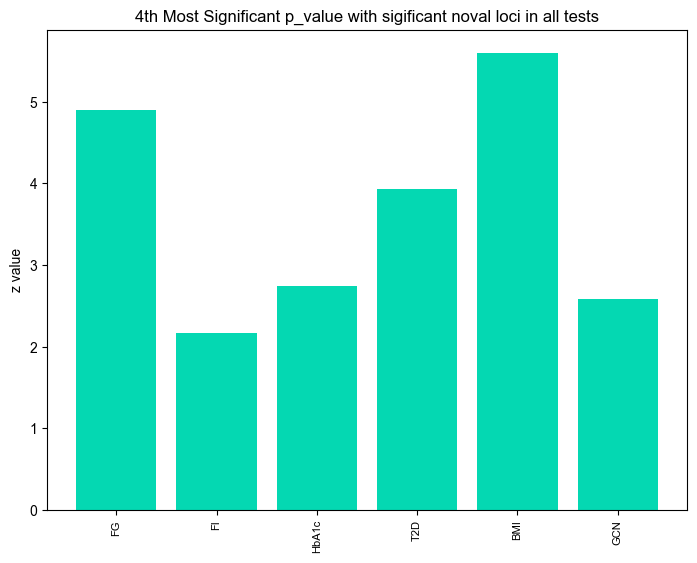

In [458]:
plot_most_sig_snp(most_sig_gcn4 , '4th Most Significant p_value with sigificant noval loci in all tests')

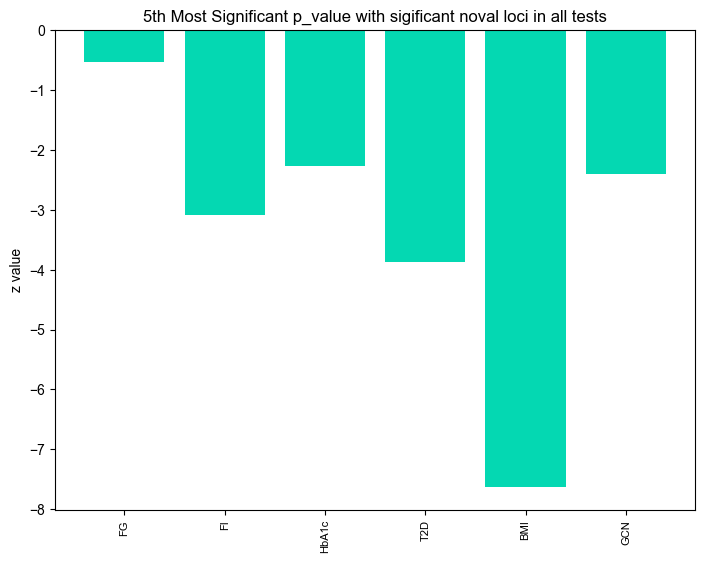

In [459]:
plot_most_sig_snp(most_sig_gcn5 , '5th Most Significant p_value with sigificant noval loci in all tests')

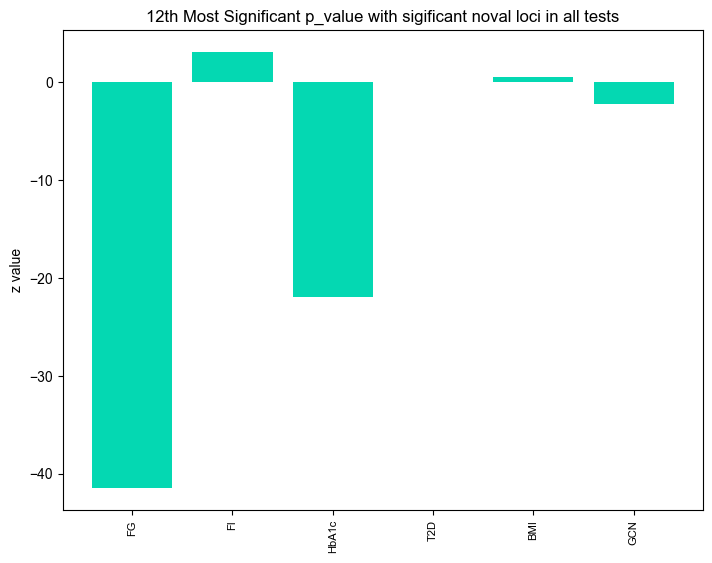

In [474]:
plot_most_sig_snp(most_sig_gcn12 , '12th Most Significant p_value with sigificant noval loci in all tests')

In [415]:
gcn_val_list

[['16', '28535305'],
 ['10', '65188318'],
 ['2', '228983546'],
 ['10', '65101207'],
 ['2', '228992850'],
 ['10', '64905113'],
 ['2', '169776139'],
 ['7', '73043665'],
 ['2', '228996438'],
 ['10', '64888493'],
 ['10', '65330208'],
 ['7', '73045483'],
 ['2', '169776360'],
 ['16', '28519096'],
 ['1', '72853409'],
 ['2', '228979510'],
 ['2', '228975064'],
 ['2', '228995185'],
 ['16', '28507644'],
 ['2', '228983992'],
 ['16', '28861881'],
 ['10', '65091110'],
 ['3', '136300732'],
 ['7', '73012785'],
 ['2', '228994423'],
 ['10', '65134778'],
 ['2', '228996470'],
 ['1', '72901515'],
 ['16', '28569764'],
 ['16', '28839392'],
 ['16', '28832382'],
 ['10', '64999490'],
 ['10', '65016174'],
 ['2', '228971884'],
 ['16', '28840381'],
 ['2', '169776414'],
 ['2', '228973660'],
 ['2', '228996116'],
 ['16', '28867804'],
 ['16', '28606160'],
 ['1', '72752939'],
 ['16', '28495752'],
 ['16', '28868695'],
 ['2', '169763148'],
 ['7', '72921609'],
 ['16', '28527221'],
 ['2', '169784493'],
 ['16', '28865892'],

In [395]:
df_GCN_result = []
for chrm, bp, ea, oa, ef, beta, se, p, _ in df_GCN[:].to_numpy():
    val = str(chrm) +"-"+ str(bp)
    if(val in result_set)
    

1-565111
